In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [2]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    male      1       0.0         A/5 21171    Mr            1  
1       1  female      1       1.0          PC 17599   Mrs            1  
2       3  female      0       1.0  STON/O2. 3101282  Miss            0  
3       1  female      1       1.0            113803   Mrs            1  
4       3    male      0       0.0            373450    Mr            0

pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. 
După instalare trebuie să facem restart la runtime.

In [5]:
from pandas_profiling import ProfileReport

/home/ioana/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
prof=ProfileReport(df)
df = df.fillna(0)

In [7]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='titanic.html')

In [8]:
prof

In [9]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [10]:
prof.to_file(output_file='titanic-min.html')

In [11]:
prof

In [12]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
from sklearn.preprocessing import LabelBinarizer
df = pd.read_csv("titanic.csv")
encoder = LabelBinarizer()

df["Sex"] = np.where(df["Sex"] == "female", 1, 0)
#print(encoder.classes)
#print(df["Title"])
X = df.drop(["Cabin", "Survived", "Name", "Title", "Embarked", "Ticket"], axis=1)
title = encoder.fit_transform(df["Title"])
print(X)
X = pd.concat([X, pd.DataFrame(title)], axis=1)
print(X)
#obținem etichetele pentru date salvand ultima coloana
y = df['Survived']



      Age     Fare  Parch  PassengerId  Pclass  Sex  SibSp  Family_Size
0    22.0   7.2500      0            1       3    0      1            1
1    38.0  71.2833      0            2       1    1      1            1
2    26.0   7.9250      0            3       3    1      0            0
3    35.0  53.1000      0            4       1    1      1            1
4    35.0   8.0500      0            5       3    0      0            0
..    ...      ...    ...          ...     ...  ...    ...          ...
886  27.0  13.0000      0          887       2    0      0            0
887  19.0  30.0000      0          888       1    1      0            0
888  22.0  23.4500      2          889       3    1      1            3
889  26.0  30.0000      0          890       1    0      0            0
890  32.0   7.7500      0          891       3    0      0            0

[891 rows x 8 columns]
      Age     Fare  Parch  PassengerId  Pclass  Sex  SibSp  Family_Size  0  1  \
0    22.0   7.2500      0      

In [13]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [14]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [15]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(275.0, 712)

In [16]:
sum(y_test), len(y_test)

(67.0, 179)

In [113]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [114]:
X_train


Age     Fare  Parch  PassengerId  Pclass  Sex  SibSp  Family_Size  0  1  \
431  35.5  16.1000      0          432       3    1      1            1  0  0   
302  19.0   0.0000      0          303       3    0      0            0  0  0   
432  42.0  26.0000      0          433       2    1      1            1  0  0   
166  35.5  55.0000      1          167       1    1      0            1  0  0   
709   4.0  15.2458      1          710       3    0      1            2  0  1   
..    ...      ...    ...          ...     ...  ...    ...          ... .. ..   
2    26.0   7.9250      0            3       3    1      0            0  0  0   
640  20.0   7.8542      0          641       3    0      0            0  0  0   
381   1.0  15.7417      2          382       3    1      0            2  0  0   
22   15.0   8.0292      0           23       3    1      0            0  0  0   
506  33.0  26.0000      2          507       2    1      0            2  0  0   

     2  3  4  5  
431  0  0  1  0  
302  0  1  0  0  
432  0  0  1  0  
166  0  0  1  0  
709  0  0  0  0  
..  .. .. .. ..  
2    1  0  0  0  
640  0  1  0  0  
381  1  0  0  0  
22   1  0  0  0  
506  0  0  1  0  

[712 rows x 14 columns]

In [ ]:
y_train

In [75]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [76]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
X_test

array([[-0.05554159, -0.94925138, -1.        , ...,  1.        ,
        -1.        , -1.        ],
       [-0.33199296, -0.89850276, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.13093742, -0.6741353 , -1.        , ...,  1.        ,
        -0.75      , -0.8       ],
       ...,
       [-0.28172908, -0.89850276, -1.        , ...,  1.        ,
        -0.75      , -0.8       ],
       [-0.63357628, -0.94357456, -1.        , ...,  1.        ,
        -0.75      , -0.8       ],
       [-0.25659713, -0.94925138, -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [78]:
import torch
from torch import nn, optim

In [79]:
X_train.shape

(712, 8)

In [80]:
y_train.shape

(712,)

In [81]:
X_test.shape

(179, 8)

In [82]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [0]:
class Dataset(Dataset):
    """ Diabetes dataset."""
    # Initialize your data, download, etc.
    def __init__(self, x, y):
        #Citim setul de date
        self.len = len(x)

        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y.values).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [ ]:
trainDataset=Dataset(X_train, y_train)


In [83]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(8,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [84]:
net = HeartDiseaseNN()

In [85]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()

In [86]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
losses = []

In [87]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()

    #Obținem predictii
    outputs = net(X_train)
    # Compute and print loss
    loss = criterion(outputs, y_train)
    
    losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Train Epoch: {epoch} Loss:{loss.item()}")

In [90]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [91]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=0
    correct = 0

    with torch.no_grad():

        output=net(X_test)

        test_loss= criterion(output, y_test)
        test_losses.append(test_loss.item())

        #Obținem predictiile pentru fiecare linie din setul de validare.
        #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
        pred = output.data.max(1, keepdim=True)[1]

        #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
        #correct += pred.eq(y_test.data.view_as(pred)).sum()
        #O altă functie din sklearn ne poate ajuta să abstractizăm operatia de mai sus.

        accuracy = accuracy_score(y_test, pred)
        
        print("============")
        print(f"[Validation set] Average loss: {test_loss}, Accuracy: {100 * accuracy}%")
        print("============")

        accuracies.append(accuracy)


In [92]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(10000):
  train(epoch)
  validation()

Train Epoch: 0 Loss:0.6822132468223572
[Validation set] Average loss: 0.6955850124359131, Accuracy: 56.424581005586596%
Train Epoch: 1 Loss:0.6805758476257324
[Validation set] Average loss: 0.6944847106933594, Accuracy: 56.424581005586596%
Train Epoch: 2 Loss:0.6789747476577759
[Validation set] Average loss: 0.693400502204895, Accuracy: 56.424581005586596%
Train Epoch: 3 Loss:0.6774048209190369
[Validation set] Average loss: 0.6923336982727051, Accuracy: 56.424581005586596%
Train Epoch: 4 Loss:0.6758669018745422
[Validation set] Average loss: 0.691281259059906, Accuracy: 56.424581005586596%
Train Epoch: 5 Loss:0.6743601560592651
[Validation set] Average loss: 0.6902437210083008, Accuracy: 56.424581005586596%
Train Epoch: 6 Loss:0.6728833913803101
[Validation set] Average loss: 0.6892192363739014, Accuracy: 56.424581005586596%
Train Epoch: 7 Loss:0.6714290380477905
[Validation set] Average loss: 0.6882084012031555, Accuracy: 56.424581005586596%
Train Epoch: 8 Loss:0.6699994206428528
[Va

[Validation set] Average loss: 0.6235206723213196, Accuracy: 62.01117318435754%
Train Epoch: 79 Loss:0.5948626399040222
[Validation set] Average loss: 0.6226153373718262, Accuracy: 62.56983240223464%
Train Epoch: 80 Loss:0.5939742922782898
[Validation set] Average loss: 0.6217104196548462, Accuracy: 63.128491620111724%
Train Epoch: 81 Loss:0.5930877327919006
[Validation set] Average loss: 0.6208052039146423, Accuracy: 63.128491620111724%
Train Epoch: 82 Loss:0.5922032594680786
[Validation set] Average loss: 0.6198980212211609, Accuracy: 63.128491620111724%
Train Epoch: 83 Loss:0.5913200974464417
[Validation set] Average loss: 0.6189910173416138, Accuracy: 63.687150837988824%
Train Epoch: 84 Loss:0.59043949842453
[Validation set] Average loss: 0.6180846095085144, Accuracy: 64.24581005586593%
Train Epoch: 85 Loss:0.5895604491233826
[Validation set] Average loss: 0.61717689037323, Accuracy: 64.24581005586593%
Train Epoch: 86 Loss:0.5886817574501038
[Validation set] Average loss: 0.6162692

[Validation set] Average loss: 0.5570279955863953, Accuracy: 72.62569832402235%
Train Epoch: 154 Loss:0.5338504314422607
[Validation set] Average loss: 0.5562175512313843, Accuracy: 72.62569832402235%
Train Epoch: 155 Loss:0.5331377983093262
[Validation set] Average loss: 0.5554114580154419, Accuracy: 72.62569832402235%
Train Epoch: 156 Loss:0.5324288606643677
[Validation set] Average loss: 0.5546081066131592, Accuracy: 72.62569832402235%
Train Epoch: 157 Loss:0.5317224860191345
[Validation set] Average loss: 0.5538070797920227, Accuracy: 72.62569832402235%
Train Epoch: 158 Loss:0.531020998954773
[Validation set] Average loss: 0.5530101656913757, Accuracy: 72.62569832402235%
Train Epoch: 159 Loss:0.530322790145874
[Validation set] Average loss: 0.5522170662879944, Accuracy: 72.62569832402235%
Train Epoch: 160 Loss:0.5296276211738586
[Validation set] Average loss: 0.5514273047447205, Accuracy: 72.62569832402235%
Train Epoch: 161 Loss:0.5289353728294373
[Validation set] Average loss: 0.5

[Validation set] Average loss: 0.4962758719921112, Accuracy: 74.30167597765363%
Train Epoch: 252 Loss:0.4817398190498352
[Validation set] Average loss: 0.4958541691303253, Accuracy: 74.30167597765363%
Train Epoch: 253 Loss:0.4813908338546753
[Validation set] Average loss: 0.49543672800064087, Accuracy: 74.86033519553072%
Train Epoch: 254 Loss:0.48104557394981384
[Validation set] Average loss: 0.49502304196357727, Accuracy: 74.86033519553072%
Train Epoch: 255 Loss:0.4807032346725464
[Validation set] Average loss: 0.49461233615875244, Accuracy: 74.86033519553072%
Train Epoch: 256 Loss:0.4803644120693207
[Validation set] Average loss: 0.49420446157455444, Accuracy: 75.41899441340783%
Train Epoch: 257 Loss:0.48002907633781433
[Validation set] Average loss: 0.49380096793174744, Accuracy: 75.41899441340783%
Train Epoch: 258 Loss:0.47969651222229004
[Validation set] Average loss: 0.49340057373046875, Accuracy: 75.41899441340783%
Train Epoch: 259 Loss:0.4793666899204254
[Validation set] Averag

[Validation set] Average loss: 0.4700167775154114, Accuracy: 77.6536312849162%
Train Epoch: 343 Loss:0.46068114042282104
[Validation set] Average loss: 0.46983802318573, Accuracy: 77.6536312849162%
Train Epoch: 344 Loss:0.4605395793914795
[Validation set] Average loss: 0.46966198086738586, Accuracy: 77.6536312849162%
Train Epoch: 345 Loss:0.4603995978832245
[Validation set] Average loss: 0.46948739886283875, Accuracy: 78.2122905027933%
Train Epoch: 346 Loss:0.46026062965393066
[Validation set] Average loss: 0.4693150520324707, Accuracy: 78.2122905027933%
Train Epoch: 347 Loss:0.4601229429244995
[Validation set] Average loss: 0.469143271446228, Accuracy: 78.2122905027933%
Train Epoch: 348 Loss:0.45998668670654297
[Validation set] Average loss: 0.468973308801651, Accuracy: 78.2122905027933%
Train Epoch: 349 Loss:0.4598519504070282
[Validation set] Average loss: 0.4688044786453247, Accuracy: 78.2122905027933%
Train Epoch: 350 Loss:0.45971864461898804
[Validation set] Average loss: 0.46863

[Validation set] Average loss: 0.46009114384651184, Accuracy: 78.2122905027933%
Train Epoch: 420 Loss:0.45282110571861267
[Validation set] Average loss: 0.4600033164024353, Accuracy: 78.2122905027933%
Train Epoch: 421 Loss:0.4527466893196106
[Validation set] Average loss: 0.45991647243499756, Accuracy: 78.2122905027933%
Train Epoch: 422 Loss:0.4526737630367279
[Validation set] Average loss: 0.4598301351070404, Accuracy: 78.2122905027933%
Train Epoch: 423 Loss:0.4526011049747467
[Validation set] Average loss: 0.4597439765930176, Accuracy: 78.2122905027933%
Train Epoch: 424 Loss:0.45252951979637146
[Validation set] Average loss: 0.4596582055091858, Accuracy: 78.2122905027933%
Train Epoch: 425 Loss:0.45245760679244995
[Validation set] Average loss: 0.4595726430416107, Accuracy: 78.2122905027933%
Train Epoch: 426 Loss:0.45238667726516724
[Validation set] Average loss: 0.45948877930641174, Accuracy: 78.2122905027933%
Train Epoch: 427 Loss:0.45231547951698303
[Validation set] Average loss: 0

Train Epoch: 496 Loss:0.4482572674751282
[Validation set] Average loss: 0.45493611693382263, Accuracy: 78.2122905027933%
Train Epoch: 497 Loss:0.44820696115493774
[Validation set] Average loss: 0.45488646626472473, Accuracy: 78.2122905027933%
Train Epoch: 498 Loss:0.4481571912765503
[Validation set] Average loss: 0.4548375606536865, Accuracy: 78.2122905027933%
Train Epoch: 499 Loss:0.44810739159584045
[Validation set] Average loss: 0.4547886848449707, Accuracy: 78.2122905027933%
Train Epoch: 500 Loss:0.44805774092674255
[Validation set] Average loss: 0.45473983883857727, Accuracy: 78.2122905027933%
Train Epoch: 501 Loss:0.44800907373428345
[Validation set] Average loss: 0.45469167828559875, Accuracy: 78.2122905027933%
Train Epoch: 502 Loss:0.4479598104953766
[Validation set] Average loss: 0.4546438753604889, Accuracy: 78.2122905027933%
Train Epoch: 503 Loss:0.4479111135005951
[Validation set] Average loss: 0.4545964002609253, Accuracy: 78.2122905027933%
Train Epoch: 504 Loss:0.44786226

[Validation set] Average loss: 0.45242395997047424, Accuracy: 78.2122905027933%
Train Epoch: 558 Loss:0.4454559087753296
[Validation set] Average loss: 0.4523896872997284, Accuracy: 78.2122905027933%
Train Epoch: 559 Loss:0.44541507959365845
[Validation set] Average loss: 0.45235463976860046, Accuracy: 78.2122905027933%
Train Epoch: 560 Loss:0.4453739523887634
[Validation set] Average loss: 0.45232006907463074, Accuracy: 78.2122905027933%
Train Epoch: 561 Loss:0.44533345103263855
[Validation set] Average loss: 0.4522859454154968, Accuracy: 78.2122905027933%
Train Epoch: 562 Loss:0.4452929198741913
[Validation set] Average loss: 0.452251672744751, Accuracy: 78.2122905027933%
Train Epoch: 563 Loss:0.44525226950645447
[Validation set] Average loss: 0.452217698097229, Accuracy: 78.2122905027933%
Train Epoch: 564 Loss:0.4452120363712311
[Validation set] Average loss: 0.45218390226364136, Accuracy: 78.2122905027933%
Train Epoch: 565 Loss:0.4451717138290405
[Validation set] Average loss: 0.45

[Validation set] Average loss: 0.4506455659866333, Accuracy: 78.2122905027933%
Train Epoch: 621 Loss:0.4430195689201355
[Validation set] Average loss: 0.4506229758262634, Accuracy: 78.2122905027933%
Train Epoch: 622 Loss:0.44298258423805237
[Validation set] Average loss: 0.4505997598171234, Accuracy: 78.2122905027933%
Train Epoch: 623 Loss:0.44294601678848267
[Validation set] Average loss: 0.45057839155197144, Accuracy: 78.2122905027933%
Train Epoch: 624 Loss:0.4429091215133667
[Validation set] Average loss: 0.4505568742752075, Accuracy: 78.2122905027933%
Train Epoch: 625 Loss:0.44287246465682983
[Validation set] Average loss: 0.45053526759147644, Accuracy: 78.2122905027933%
Train Epoch: 626 Loss:0.44283539056777954
[Validation set] Average loss: 0.4505142867565155, Accuracy: 78.2122905027933%
Train Epoch: 627 Loss:0.44279950857162476
[Validation set] Average loss: 0.4504929780960083, Accuracy: 78.2122905027933%
Train Epoch: 628 Loss:0.44276291131973267
[Validation set] Average loss: 0

Train Epoch: 684 Loss:0.44080913066864014
[Validation set] Average loss: 0.4493720531463623, Accuracy: 78.2122905027933%
Train Epoch: 685 Loss:0.44077518582344055
[Validation set] Average loss: 0.4493570923805237, Accuracy: 78.2122905027933%
Train Epoch: 686 Loss:0.4407408535480499
[Validation set] Average loss: 0.4493423402309418, Accuracy: 78.2122905027933%
Train Epoch: 687 Loss:0.4407065212726593
[Validation set] Average loss: 0.44932812452316284, Accuracy: 78.2122905027933%
Train Epoch: 688 Loss:0.44067227840423584
[Validation set] Average loss: 0.44931408762931824, Accuracy: 78.2122905027933%
Train Epoch: 689 Loss:0.44063839316368103
[Validation set] Average loss: 0.44929948449134827, Accuracy: 78.2122905027933%
Train Epoch: 690 Loss:0.4406038224697113
[Validation set] Average loss: 0.44928473234176636, Accuracy: 78.2122905027933%
Train Epoch: 691 Loss:0.44057023525238037
[Validation set] Average loss: 0.4492698609828949, Accuracy: 78.2122905027933%
Train Epoch: 692 Loss:0.4405362

Train Epoch: 756 Loss:0.43844112753868103
[Validation set] Average loss: 0.4483868181705475, Accuracy: 78.2122905027933%
Train Epoch: 757 Loss:0.4384091794490814
[Validation set] Average loss: 0.4483778476715088, Accuracy: 78.2122905027933%
Train Epoch: 758 Loss:0.43837741017341614
[Validation set] Average loss: 0.44836920499801636, Accuracy: 78.2122905027933%
Train Epoch: 759 Loss:0.43834608793258667
[Validation set] Average loss: 0.4483601152896881, Accuracy: 78.2122905027933%
Train Epoch: 760 Loss:0.43831485509872437
[Validation set] Average loss: 0.4483503997325897, Accuracy: 78.2122905027933%
Train Epoch: 761 Loss:0.43828335404396057
[Validation set] Average loss: 0.4483409821987152, Accuracy: 78.2122905027933%
Train Epoch: 762 Loss:0.43825146555900574
[Validation set] Average loss: 0.4483310580253601, Accuracy: 78.2122905027933%
Train Epoch: 763 Loss:0.43822017312049866
[Validation set] Average loss: 0.4483209550380707, Accuracy: 78.2122905027933%
Train Epoch: 764 Loss:0.43818908

[Validation set] Average loss: 0.44769197702407837, Accuracy: 78.2122905027933%
Train Epoch: 826 Loss:0.4363272190093994
[Validation set] Average loss: 0.4476834535598755, Accuracy: 78.2122905027933%
Train Epoch: 827 Loss:0.43629810214042664
[Validation set] Average loss: 0.44767436385154724, Accuracy: 78.2122905027933%
Train Epoch: 828 Loss:0.43626922369003296
[Validation set] Average loss: 0.4476652145385742, Accuracy: 78.2122905027933%
Train Epoch: 829 Loss:0.4362402558326721
[Validation set] Average loss: 0.447656512260437, Accuracy: 78.2122905027933%
Train Epoch: 830 Loss:0.4362111985683441
[Validation set] Average loss: 0.4476476013660431, Accuracy: 78.2122905027933%
Train Epoch: 831 Loss:0.4361821413040161
[Validation set] Average loss: 0.4476376473903656, Accuracy: 78.2122905027933%
Train Epoch: 832 Loss:0.4361531436443329
[Validation set] Average loss: 0.44762784242630005, Accuracy: 78.2122905027933%
Train Epoch: 833 Loss:0.4361245334148407
[Validation set] Average loss: 0.447

Train Epoch: 890 Loss:0.4345211982727051
[Validation set] Average loss: 0.44717276096343994, Accuracy: 78.2122905027933%
Train Epoch: 891 Loss:0.4344937205314636
[Validation set] Average loss: 0.44716814160346985, Accuracy: 78.2122905027933%
Train Epoch: 892 Loss:0.4344659447669983
[Validation set] Average loss: 0.4471636414527893, Accuracy: 78.2122905027933%
Train Epoch: 893 Loss:0.43443819880485535
[Validation set] Average loss: 0.44715890288352966, Accuracy: 78.2122905027933%
Train Epoch: 894 Loss:0.434410959482193
[Validation set] Average loss: 0.44715315103530884, Accuracy: 78.2122905027933%
Train Epoch: 895 Loss:0.4343833923339844
[Validation set] Average loss: 0.44714781641960144, Accuracy: 78.2122905027933%
Train Epoch: 896 Loss:0.43435564637184143
[Validation set] Average loss: 0.4471418857574463, Accuracy: 78.2122905027933%
Train Epoch: 897 Loss:0.43432801961898804
[Validation set] Average loss: 0.4471361041069031, Accuracy: 78.2122905027933%
Train Epoch: 898 Loss:0.434300869

[Validation set] Average loss: 0.4468485713005066, Accuracy: 77.6536312849162%
Train Epoch: 958 Loss:0.4327133595943451
[Validation set] Average loss: 0.4468435049057007, Accuracy: 77.6536312849162%
Train Epoch: 959 Loss:0.43268829584121704
[Validation set] Average loss: 0.44683849811553955, Accuracy: 77.6536312849162%
Train Epoch: 960 Loss:0.43266257643699646
[Validation set] Average loss: 0.4468335211277008, Accuracy: 77.6536312849162%
Train Epoch: 961 Loss:0.43263715505599976
[Validation set] Average loss: 0.44682836532592773, Accuracy: 77.6536312849162%
Train Epoch: 962 Loss:0.43261149525642395
[Validation set] Average loss: 0.44682368636131287, Accuracy: 77.6536312849162%
Train Epoch: 963 Loss:0.4325861632823944
[Validation set] Average loss: 0.44681844115257263, Accuracy: 77.6536312849162%
Train Epoch: 964 Loss:0.43256062269210815
[Validation set] Average loss: 0.4468131363391876, Accuracy: 77.6536312849162%
Train Epoch: 965 Loss:0.4325353503227234
[Validation set] Average loss: 

Train Epoch: 1025 Loss:0.43103906512260437
[Validation set] Average loss: 0.44651108980178833, Accuracy: 77.09497206703911%
Train Epoch: 1026 Loss:0.43101510405540466
[Validation set] Average loss: 0.4465077519416809, Accuracy: 77.09497206703911%
Train Epoch: 1027 Loss:0.43099093437194824
[Validation set] Average loss: 0.44650450348854065, Accuracy: 77.09497206703911%
Train Epoch: 1028 Loss:0.4309661388397217
[Validation set] Average loss: 0.4465011656284332, Accuracy: 77.09497206703911%
Train Epoch: 1029 Loss:0.4309421181678772
[Validation set] Average loss: 0.44649770855903625, Accuracy: 77.09497206703911%
Train Epoch: 1030 Loss:0.4309174120426178
[Validation set] Average loss: 0.4464936852455139, Accuracy: 77.09497206703911%
Train Epoch: 1031 Loss:0.43089351058006287
[Validation set] Average loss: 0.44649016857147217, Accuracy: 77.09497206703911%
Train Epoch: 1032 Loss:0.4308692514896393
[Validation set] Average loss: 0.44648656249046326, Accuracy: 77.09497206703911%
Train Epoch: 10

[Validation set] Average loss: 0.4461438059806824, Accuracy: 77.6536312849162%
Train Epoch: 1125 Loss:0.42868441343307495
[Validation set] Average loss: 0.44614070653915405, Accuracy: 77.6536312849162%
Train Epoch: 1126 Loss:0.42866194248199463
[Validation set] Average loss: 0.4461371898651123, Accuracy: 77.6536312849162%
Train Epoch: 1127 Loss:0.42863982915878296
[Validation set] Average loss: 0.4461333751678467, Accuracy: 77.6536312849162%
Train Epoch: 1128 Loss:0.42861711978912354
[Validation set] Average loss: 0.44612985849380493, Accuracy: 77.6536312849162%
Train Epoch: 1129 Loss:0.42859482765197754
[Validation set] Average loss: 0.4461261034011841, Accuracy: 77.6536312849162%
Train Epoch: 1130 Loss:0.42857274413108826
[Validation set] Average loss: 0.44612252712249756, Accuracy: 77.6536312849162%
Train Epoch: 1131 Loss:0.42855000495910645
[Validation set] Average loss: 0.44611895084381104, Accuracy: 77.6536312849162%
Train Epoch: 1132 Loss:0.4285275340080261
[Validation set] Aver

Train Epoch: 1202 Loss:0.42703816294670105
[Validation set] Average loss: 0.4458184838294983, Accuracy: 77.6536312849162%
Train Epoch: 1203 Loss:0.4270181655883789
[Validation set] Average loss: 0.4458135962486267, Accuracy: 77.6536312849162%
Train Epoch: 1204 Loss:0.42699775099754333
[Validation set] Average loss: 0.4458093047142029, Accuracy: 77.6536312849162%
Train Epoch: 1205 Loss:0.42697739601135254
[Validation set] Average loss: 0.4458051323890686, Accuracy: 77.6536312849162%
Train Epoch: 1206 Loss:0.42695656418800354
[Validation set] Average loss: 0.4458007514476776, Accuracy: 77.6536312849162%
Train Epoch: 1207 Loss:0.42693671584129333
[Validation set] Average loss: 0.44579610228538513, Accuracy: 77.6536312849162%
Train Epoch: 1208 Loss:0.42691653966903687
[Validation set] Average loss: 0.4457920789718628, Accuracy: 77.6536312849162%
Train Epoch: 1209 Loss:0.42689600586891174
[Validation set] Average loss: 0.44578811526298523, Accuracy: 77.6536312849162%
Train Epoch: 1210 Loss:

[Validation set] Average loss: 0.44547510147094727, Accuracy: 77.6536312849162%
Train Epoch: 1276 Loss:0.42557352781295776
[Validation set] Average loss: 0.4454699754714966, Accuracy: 77.6536312849162%
Train Epoch: 1277 Loss:0.4255548417568207
[Validation set] Average loss: 0.44546541571617126, Accuracy: 77.6536312849162%
Train Epoch: 1278 Loss:0.42553552985191345
[Validation set] Average loss: 0.44546079635620117, Accuracy: 77.6536312849162%
Train Epoch: 1279 Loss:0.42551669478416443
[Validation set] Average loss: 0.44545644521713257, Accuracy: 77.6536312849162%
Train Epoch: 1280 Loss:0.4254978895187378
[Validation set] Average loss: 0.44545212388038635, Accuracy: 77.6536312849162%
Train Epoch: 1281 Loss:0.4254790246486664
[Validation set] Average loss: 0.4454476535320282, Accuracy: 77.6536312849162%
Train Epoch: 1282 Loss:0.42545995116233826
[Validation set] Average loss: 0.4454435110092163, Accuracy: 77.6536312849162%
Train Epoch: 1283 Loss:0.4254412353038788
[Validation set] Averag

[Validation set] Average loss: 0.4451585114002228, Accuracy: 77.09497206703911%
Train Epoch: 1345 Loss:0.4242944121360779
[Validation set] Average loss: 0.44515368342399597, Accuracy: 77.09497206703911%
Train Epoch: 1346 Loss:0.4242766797542572
[Validation set] Average loss: 0.44515010714530945, Accuracy: 77.6536312849162%
Train Epoch: 1347 Loss:0.42425838112831116
[Validation set] Average loss: 0.4451456367969513, Accuracy: 77.6536312849162%
Train Epoch: 1348 Loss:0.4242403209209442
[Validation set] Average loss: 0.44514200091362, Accuracy: 77.6536312849162%
Train Epoch: 1349 Loss:0.42422211170196533
[Validation set] Average loss: 0.44513723254203796, Accuracy: 77.6536312849162%
Train Epoch: 1350 Loss:0.4242040514945984
[Validation set] Average loss: 0.44513386487960815, Accuracy: 77.6536312849162%
Train Epoch: 1351 Loss:0.4241863489151001
[Validation set] Average loss: 0.4451291263103485, Accuracy: 77.6536312849162%
Train Epoch: 1352 Loss:0.4241684079170227
[Validation set] Average l

[Validation set] Average loss: 0.4449458718299866, Accuracy: 77.6536312849162%
Train Epoch: 1412 Loss:0.42311230301856995
[Validation set] Average loss: 0.4449429512023926, Accuracy: 77.6536312849162%
Train Epoch: 1413 Loss:0.4230952858924866
[Validation set] Average loss: 0.4449410140514374, Accuracy: 77.6536312849162%
Train Epoch: 1414 Loss:0.42307817935943604
[Validation set] Average loss: 0.4449392557144165, Accuracy: 77.6536312849162%
Train Epoch: 1415 Loss:0.4230603873729706
[Validation set] Average loss: 0.4449363052845001, Accuracy: 77.6536312849162%
Train Epoch: 1416 Loss:0.4230436384677887
[Validation set] Average loss: 0.444934606552124, Accuracy: 77.6536312849162%
Train Epoch: 1417 Loss:0.42302635312080383
[Validation set] Average loss: 0.4449320137500763, Accuracy: 77.6536312849162%
Train Epoch: 1418 Loss:0.42300960421562195
[Validation set] Average loss: 0.44493070244789124, Accuracy: 77.6536312849162%
Train Epoch: 1419 Loss:0.42299240827560425
[Validation set] Average lo

[Validation set] Average loss: 0.4447033405303955, Accuracy: 78.2122905027933%
Train Epoch: 1509 Loss:0.4215058386325836
[Validation set] Average loss: 0.44470158219337463, Accuracy: 78.2122905027933%
Train Epoch: 1510 Loss:0.4214897155761719
[Validation set] Average loss: 0.4447001814842224, Accuracy: 78.2122905027933%
Train Epoch: 1511 Loss:0.42147350311279297
[Validation set] Average loss: 0.44469740986824036, Accuracy: 78.2122905027933%
Train Epoch: 1512 Loss:0.42145779728889465
[Validation set] Average loss: 0.44469568133354187, Accuracy: 78.2122905027933%
Train Epoch: 1513 Loss:0.4214414060115814
[Validation set] Average loss: 0.4446942210197449, Accuracy: 78.2122905027933%
Train Epoch: 1514 Loss:0.42142534255981445
[Validation set] Average loss: 0.44469234347343445, Accuracy: 78.2122905027933%
Train Epoch: 1515 Loss:0.4214089512825012
[Validation set] Average loss: 0.44468992948532104, Accuracy: 78.2122905027933%
Train Epoch: 1516 Loss:0.4213930666446686
[Validation set] Average

Train Epoch: 1568 Loss:0.4205668270587921
[Validation set] Average loss: 0.44456911087036133, Accuracy: 78.2122905027933%
Train Epoch: 1569 Loss:0.42055079340934753
[Validation set] Average loss: 0.4445681571960449, Accuracy: 78.2122905027933%
Train Epoch: 1570 Loss:0.42053544521331787
[Validation set] Average loss: 0.4445669651031494, Accuracy: 78.2122905027933%
Train Epoch: 1571 Loss:0.42051973938941956
[Validation set] Average loss: 0.4445672631263733, Accuracy: 78.2122905027933%
Train Epoch: 1572 Loss:0.4205044209957123
[Validation set] Average loss: 0.4445655047893524, Accuracy: 78.2122905027933%
Train Epoch: 1573 Loss:0.42048877477645874
[Validation set] Average loss: 0.44456562399864197, Accuracy: 78.2122905027933%
Train Epoch: 1574 Loss:0.4204729497432709
[Validation set] Average loss: 0.4445641338825226, Accuracy: 78.2122905027933%
Train Epoch: 1575 Loss:0.42045751214027405
[Validation set] Average loss: 0.4445638358592987, Accuracy: 78.2122905027933%
Train Epoch: 1576 Loss:0.

[Validation set] Average loss: 0.4444938600063324, Accuracy: 78.2122905027933%
Train Epoch: 1630 Loss:0.4196149706840515
[Validation set] Average loss: 0.44449102878570557, Accuracy: 78.2122905027933%
Train Epoch: 1631 Loss:0.4195997714996338
[Validation set] Average loss: 0.44448915123939514, Accuracy: 78.2122905027933%
Train Epoch: 1632 Loss:0.4195847809314728
[Validation set] Average loss: 0.4444866180419922, Accuracy: 78.2122905027933%
Train Epoch: 1633 Loss:0.41956984996795654
[Validation set] Average loss: 0.44448399543762207, Accuracy: 78.2122905027933%
Train Epoch: 1634 Loss:0.41955479979515076
[Validation set] Average loss: 0.44448161125183105, Accuracy: 78.2122905027933%
Train Epoch: 1635 Loss:0.41953983902931213
[Validation set] Average loss: 0.44447973370552063, Accuracy: 78.2122905027933%
Train Epoch: 1636 Loss:0.419525146484375
[Validation set] Average loss: 0.4444778561592102, Accuracy: 78.2122905027933%
Train Epoch: 1637 Loss:0.419510155916214
[Validation set] Average l

Train Epoch: 1687 Loss:0.4187808036804199
[Validation set] Average loss: 0.444429486989975, Accuracy: 78.2122905027933%
Train Epoch: 1688 Loss:0.4187666177749634
[Validation set] Average loss: 0.44443008303642273, Accuracy: 78.2122905027933%
Train Epoch: 1689 Loss:0.41875195503234863
[Validation set] Average loss: 0.44442957639694214, Accuracy: 78.2122905027933%
Train Epoch: 1690 Loss:0.4187379777431488
[Validation set] Average loss: 0.4444299340248108, Accuracy: 78.2122905027933%
Train Epoch: 1691 Loss:0.41872379183769226
[Validation set] Average loss: 0.44443029165267944, Accuracy: 78.2122905027933%
Train Epoch: 1692 Loss:0.4187096059322357
[Validation set] Average loss: 0.44443097710609436, Accuracy: 78.2122905027933%
Train Epoch: 1693 Loss:0.41869550943374634
[Validation set] Average loss: 0.4444308280944824, Accuracy: 78.2122905027933%
Train Epoch: 1694 Loss:0.41868138313293457
[Validation set] Average loss: 0.444430947303772, Accuracy: 78.2122905027933%
Train Epoch: 1695 Loss:0.4

Train Epoch: 1749 Loss:0.41791149973869324
[Validation set] Average loss: 0.44446372985839844, Accuracy: 78.2122905027933%
Train Epoch: 1750 Loss:0.4178977608680725
[Validation set] Average loss: 0.44446486234664917, Accuracy: 78.2122905027933%
Train Epoch: 1751 Loss:0.417883962392807
[Validation set] Average loss: 0.4444652497768402, Accuracy: 78.2122905027933%
Train Epoch: 1752 Loss:0.4178702235221863
[Validation set] Average loss: 0.4444658160209656, Accuracy: 78.2122905027933%
Train Epoch: 1753 Loss:0.4178566634654999
[Validation set] Average loss: 0.44446662068367004, Accuracy: 78.2122905027933%
Train Epoch: 1754 Loss:0.4178427457809448
[Validation set] Average loss: 0.4444670081138611, Accuracy: 78.2122905027933%
Train Epoch: 1755 Loss:0.4178290069103241
[Validation set] Average loss: 0.444468230009079, Accuracy: 78.2122905027933%
Train Epoch: 1756 Loss:0.41781556606292725
[Validation set] Average loss: 0.44446882605552673, Accuracy: 78.2122905027933%
Train Epoch: 1757 Loss:0.417

Train Epoch: 1808 Loss:0.4171147346496582
[Validation set] Average loss: 0.444516658782959, Accuracy: 78.77094972067039%
Train Epoch: 1809 Loss:0.41710177063941956
[Validation set] Average loss: 0.4445183277130127, Accuracy: 78.77094972067039%
Train Epoch: 1810 Loss:0.4170885980129242
[Validation set] Average loss: 0.4445192217826843, Accuracy: 78.77094972067039%
Train Epoch: 1811 Loss:0.4170753061771393
[Validation set] Average loss: 0.4445204436779022, Accuracy: 78.77094972067039%
Train Epoch: 1812 Loss:0.4170621335506439
[Validation set] Average loss: 0.4445212185382843, Accuracy: 78.77094972067039%
Train Epoch: 1813 Loss:0.41704899072647095
[Validation set] Average loss: 0.4445226192474365, Accuracy: 78.77094972067039%
Train Epoch: 1814 Loss:0.4170359969139099
[Validation set] Average loss: 0.44452348351478577, Accuracy: 78.77094972067039%
Train Epoch: 1815 Loss:0.4170229732990265
[Validation set] Average loss: 0.4445243775844574, Accuracy: 78.77094972067039%
Train Epoch: 1816 Loss

Train Epoch: 1869 Loss:0.4163265824317932
[Validation set] Average loss: 0.44460028409957886, Accuracy: 78.77094972067039%
Train Epoch: 1870 Loss:0.4163138270378113
[Validation set] Average loss: 0.4446026682853699, Accuracy: 78.77094972067039%
Train Epoch: 1871 Loss:0.41630154848098755
[Validation set] Average loss: 0.4446047246456146, Accuracy: 78.77094972067039%
Train Epoch: 1872 Loss:0.4162885546684265
[Validation set] Average loss: 0.44460561871528625, Accuracy: 78.77094972067039%
Train Epoch: 1873 Loss:0.416276216506958
[Validation set] Average loss: 0.4446079134941101, Accuracy: 78.77094972067039%
Train Epoch: 1874 Loss:0.41626349091529846
[Validation set] Average loss: 0.44460824131965637, Accuracy: 78.77094972067039%
Train Epoch: 1875 Loss:0.4162510931491852
[Validation set] Average loss: 0.44461050629615784, Accuracy: 78.77094972067039%
Train Epoch: 1876 Loss:0.41623836755752563
[Validation set] Average loss: 0.4446125626564026, Accuracy: 78.77094972067039%
Train Epoch: 1877 

Train Epoch: 1934 Loss:0.4155244827270508
[Validation set] Average loss: 0.4446620047092438, Accuracy: 78.77094972067039%
Train Epoch: 1935 Loss:0.41551268100738525
[Validation set] Average loss: 0.4446631371974945, Accuracy: 78.77094972067039%
Train Epoch: 1936 Loss:0.41550037264823914
[Validation set] Average loss: 0.44466450810432434, Accuracy: 78.77094972067039%
Train Epoch: 1937 Loss:0.4154885411262512
[Validation set] Average loss: 0.44466570019721985, Accuracy: 78.77094972067039%
Train Epoch: 1938 Loss:0.41547664999961853
[Validation set] Average loss: 0.44466710090637207, Accuracy: 78.77094972067039%
Train Epoch: 1939 Loss:0.4154646396636963
[Validation set] Average loss: 0.4446682631969452, Accuracy: 78.77094972067039%
Train Epoch: 1940 Loss:0.41545262932777405
[Validation set] Average loss: 0.44466859102249146, Accuracy: 78.77094972067039%
Train Epoch: 1941 Loss:0.41544055938720703
[Validation set] Average loss: 0.4446702301502228, Accuracy: 78.77094972067039%
Train Epoch: 19

[Validation set] Average loss: 0.4447612762451172, Accuracy: 78.77094972067039%
Train Epoch: 1999 Loss:0.41475874185562134
[Validation set] Average loss: 0.4447629153728485, Accuracy: 78.77094972067039%
Train Epoch: 2000 Loss:0.41474708914756775
[Validation set] Average loss: 0.4447646737098694, Accuracy: 78.77094972067039%
Train Epoch: 2001 Loss:0.4147356450557709
[Validation set] Average loss: 0.44476598501205444, Accuracy: 78.77094972067039%
Train Epoch: 2002 Loss:0.414724200963974
[Validation set] Average loss: 0.44476762413978577, Accuracy: 78.77094972067039%
Train Epoch: 2003 Loss:0.4147128760814667
[Validation set] Average loss: 0.44476959109306335, Accuracy: 78.77094972067039%
Train Epoch: 2004 Loss:0.41470104455947876
[Validation set] Average loss: 0.4447709918022156, Accuracy: 78.77094972067039%
Train Epoch: 2005 Loss:0.4146895110607147
[Validation set] Average loss: 0.4447725713253021, Accuracy: 78.77094972067039%
Train Epoch: 2006 Loss:0.41467800736427307
[Validation set] A

[Validation set] Average loss: 0.4448983073234558, Accuracy: 78.77094972067039%
Train Epoch: 2068 Loss:0.41398003697395325
[Validation set] Average loss: 0.44489923119544983, Accuracy: 78.77094972067039%
Train Epoch: 2069 Loss:0.4139692187309265
[Validation set] Average loss: 0.4449019730091095, Accuracy: 78.77094972067039%
Train Epoch: 2070 Loss:0.4139578640460968
[Validation set] Average loss: 0.4449041783809662, Accuracy: 78.77094972067039%
Train Epoch: 2071 Loss:0.41394707560539246
[Validation set] Average loss: 0.44490861892700195, Accuracy: 78.77094972067039%
Train Epoch: 2072 Loss:0.4139361083507538
[Validation set] Average loss: 0.4449104368686676, Accuracy: 78.77094972067039%
Train Epoch: 2073 Loss:0.413925439119339
[Validation set] Average loss: 0.4449124336242676, Accuracy: 78.77094972067039%
Train Epoch: 2074 Loss:0.41391441226005554
[Validation set] Average loss: 0.4449167847633362, Accuracy: 78.77094972067039%
Train Epoch: 2075 Loss:0.413903146982193
[Validation set] Aver

[Validation set] Average loss: 0.4450289011001587, Accuracy: 78.2122905027933%
Train Epoch: 2128 Loss:0.413328617811203
[Validation set] Average loss: 0.44503268599510193, Accuracy: 78.2122905027933%
Train Epoch: 2129 Loss:0.41331785917282104
[Validation set] Average loss: 0.4450342059135437, Accuracy: 78.2122905027933%
Train Epoch: 2130 Loss:0.4133068919181824
[Validation set] Average loss: 0.4450375437736511, Accuracy: 78.2122905027933%
Train Epoch: 2131 Loss:0.4132964313030243
[Validation set] Average loss: 0.445039838552475, Accuracy: 78.2122905027933%
Train Epoch: 2132 Loss:0.4132859408855438
[Validation set] Average loss: 0.44504088163375854, Accuracy: 78.2122905027933%
Train Epoch: 2133 Loss:0.4132753014564514
[Validation set] Average loss: 0.4450446665287018, Accuracy: 78.2122905027933%
Train Epoch: 2134 Loss:0.4132646322250366
[Validation set] Average loss: 0.44504687190055847, Accuracy: 78.2122905027933%
Train Epoch: 2135 Loss:0.4132537841796875
[Validation set] Average loss:

[Validation set] Average loss: 0.4451967775821686, Accuracy: 78.2122905027933%
Train Epoch: 2192 Loss:0.4126536250114441
[Validation set] Average loss: 0.4451998174190521, Accuracy: 78.2122905027933%
Train Epoch: 2193 Loss:0.41264355182647705
[Validation set] Average loss: 0.44520190358161926, Accuracy: 78.2122905027933%
Train Epoch: 2194 Loss:0.41263288259506226
[Validation set] Average loss: 0.44520461559295654, Accuracy: 78.2122905027933%
Train Epoch: 2195 Loss:0.41262298822402954
[Validation set] Average loss: 0.4452061057090759, Accuracy: 78.2122905027933%
Train Epoch: 2196 Loss:0.41261252760887146
[Validation set] Average loss: 0.4452081620693207, Accuracy: 78.2122905027933%
Train Epoch: 2197 Loss:0.41260185837745667
[Validation set] Average loss: 0.4452115595340729, Accuracy: 78.2122905027933%
Train Epoch: 2198 Loss:0.4125920534133911
[Validation set] Average loss: 0.44521281123161316, Accuracy: 78.2122905027933%
Train Epoch: 2199 Loss:0.41258150339126587
[Validation set] Averag

Train Epoch: 2262 Loss:0.411953330039978
[Validation set] Average loss: 0.44536739587783813, Accuracy: 78.2122905027933%
Train Epoch: 2263 Loss:0.4119436740875244
[Validation set] Average loss: 0.4453688859939575, Accuracy: 78.2122905027933%
Train Epoch: 2264 Loss:0.41193386912345886
[Validation set] Average loss: 0.44537076354026794, Accuracy: 78.2122905027933%
Train Epoch: 2265 Loss:0.41192421317100525
[Validation set] Average loss: 0.44537103176116943, Accuracy: 78.2122905027933%
Train Epoch: 2266 Loss:0.4119146466255188
[Validation set] Average loss: 0.4453713297843933, Accuracy: 78.2122905027933%
Train Epoch: 2267 Loss:0.41190478205680847
[Validation set] Average loss: 0.4453721344470978, Accuracy: 78.2122905027933%
Train Epoch: 2268 Loss:0.4118950664997101
[Validation set] Average loss: 0.44537246227264404, Accuracy: 78.2122905027933%
Train Epoch: 2269 Loss:0.4118853509426117
[Validation set] Average loss: 0.4453733265399933, Accuracy: 78.2122905027933%
Train Epoch: 2270 Loss:0.4

Train Epoch: 2375 Loss:0.41089320182800293
[Validation set] Average loss: 0.44553256034851074, Accuracy: 78.2122905027933%
Train Epoch: 2376 Loss:0.41088351607322693
[Validation set] Average loss: 0.44553372263908386, Accuracy: 78.2122905027933%
Train Epoch: 2377 Loss:0.41087475419044495
[Validation set] Average loss: 0.4455351233482361, Accuracy: 78.2122905027933%
Train Epoch: 2378 Loss:0.41086557507514954
[Validation set] Average loss: 0.4455365538597107, Accuracy: 78.2122905027933%
Train Epoch: 2379 Loss:0.4108564257621765
[Validation set] Average loss: 0.4455377459526062, Accuracy: 78.2122905027933%
Train Epoch: 2380 Loss:0.4108472168445587
[Validation set] Average loss: 0.44553908705711365, Accuracy: 78.2122905027933%
Train Epoch: 2381 Loss:0.41083821654319763
[Validation set] Average loss: 0.4455403685569763, Accuracy: 78.2122905027933%
Train Epoch: 2382 Loss:0.41082900762557983
[Validation set] Average loss: 0.4455415904521942, Accuracy: 78.2122905027933%
Train Epoch: 2383 Loss:

Train Epoch: 2439 Loss:0.41032254695892334
[Validation set] Average loss: 0.4456740617752075, Accuracy: 78.2122905027933%
Train Epoch: 2440 Loss:0.41031384468078613
[Validation set] Average loss: 0.44567665457725525, Accuracy: 78.2122905027933%
Train Epoch: 2441 Loss:0.4103051424026489
[Validation set] Average loss: 0.44567957520484924, Accuracy: 78.2122905027933%
Train Epoch: 2442 Loss:0.4102964997291565
[Validation set] Average loss: 0.44568267464637756, Accuracy: 78.2122905027933%
Train Epoch: 2443 Loss:0.4102882742881775
[Validation set] Average loss: 0.4456850290298462, Accuracy: 78.2122905027933%
Train Epoch: 2444 Loss:0.41027942299842834
[Validation set] Average loss: 0.44568756222724915, Accuracy: 78.2122905027933%
Train Epoch: 2445 Loss:0.4102713465690613
[Validation set] Average loss: 0.4456906318664551, Accuracy: 78.2122905027933%
Train Epoch: 2446 Loss:0.41026270389556885
[Validation set] Average loss: 0.4456934928894043, Accuracy: 78.2122905027933%
Train Epoch: 2447 Loss:0

[Validation set] Average loss: 0.4458577334880829, Accuracy: 78.2122905027933%
Train Epoch: 2508 Loss:0.4097526967525482
[Validation set] Average loss: 0.44586148858070374, Accuracy: 78.2122905027933%
Train Epoch: 2509 Loss:0.4097447395324707
[Validation set] Average loss: 0.4458635151386261, Accuracy: 78.2122905027933%
Train Epoch: 2510 Loss:0.40973690152168274
[Validation set] Average loss: 0.4458676278591156, Accuracy: 78.2122905027933%
Train Epoch: 2511 Loss:0.40972900390625
[Validation set] Average loss: 0.44586944580078125, Accuracy: 78.2122905027933%
Train Epoch: 2512 Loss:0.4097209870815277
[Validation set] Average loss: 0.44587284326553345, Accuracy: 78.2122905027933%
Train Epoch: 2513 Loss:0.4097130298614502
[Validation set] Average loss: 0.4458777606487274, Accuracy: 78.2122905027933%
Train Epoch: 2514 Loss:0.4097053110599518
[Validation set] Average loss: 0.44588226079940796, Accuracy: 78.2122905027933%
Train Epoch: 2515 Loss:0.40969711542129517
[Validation set] Average los

[Validation set] Average loss: 0.446126788854599, Accuracy: 78.2122905027933%
Train Epoch: 2585 Loss:0.4091476798057556
[Validation set] Average loss: 0.4461291432380676, Accuracy: 78.2122905027933%
Train Epoch: 2586 Loss:0.40914005041122437
[Validation set] Average loss: 0.4461328089237213, Accuracy: 78.2122905027933%
Train Epoch: 2587 Loss:0.40913188457489014
[Validation set] Average loss: 0.44613778591156006, Accuracy: 78.2122905027933%
Train Epoch: 2588 Loss:0.4091245234012604
[Validation set] Average loss: 0.44613996148109436, Accuracy: 78.2122905027933%
Train Epoch: 2589 Loss:0.4091162383556366
[Validation set] Average loss: 0.44614291191101074, Accuracy: 78.2122905027933%
Train Epoch: 2590 Loss:0.40910887718200684
[Validation set] Average loss: 0.44614624977111816, Accuracy: 78.2122905027933%
Train Epoch: 2591 Loss:0.4091009497642517
[Validation set] Average loss: 0.44614845514297485, Accuracy: 78.2122905027933%
Train Epoch: 2592 Loss:0.40909361839294434
[Validation set] Average

[Validation set] Average loss: 0.44635286927223206, Accuracy: 78.2122905027933%
Train Epoch: 2669 Loss:0.40851691365242004
[Validation set] Average loss: 0.4463549256324768, Accuracy: 78.2122905027933%
Train Epoch: 2670 Loss:0.4085099399089813
[Validation set] Average loss: 0.44635772705078125, Accuracy: 78.2122905027933%
Train Epoch: 2671 Loss:0.40850281715393066
[Validation set] Average loss: 0.446359246969223, Accuracy: 78.2122905027933%
Train Epoch: 2672 Loss:0.40849560499191284
[Validation set] Average loss: 0.4463624060153961, Accuracy: 78.2122905027933%
Train Epoch: 2673 Loss:0.40848836302757263
[Validation set] Average loss: 0.4463639557361603, Accuracy: 78.2122905027933%
Train Epoch: 2674 Loss:0.40848100185394287
[Validation set] Average loss: 0.44636526703834534, Accuracy: 78.2122905027933%
Train Epoch: 2675 Loss:0.40847349166870117
[Validation set] Average loss: 0.44636884331703186, Accuracy: 78.2122905027933%
Train Epoch: 2676 Loss:0.4084661304950714
[Validation set] Averag

[Validation set] Average loss: 0.44666993618011475, Accuracy: 78.2122905027933%
Train Epoch: 2754 Loss:0.4079037308692932
[Validation set] Average loss: 0.4466748833656311, Accuracy: 78.2122905027933%
Train Epoch: 2755 Loss:0.4078967571258545
[Validation set] Average loss: 0.4466764032840729, Accuracy: 78.2122905027933%
Train Epoch: 2756 Loss:0.4078895151615143
[Validation set] Average loss: 0.4466800391674042, Accuracy: 78.2122905027933%
Train Epoch: 2757 Loss:0.40788212418556213
[Validation set] Average loss: 0.4466840922832489, Accuracy: 78.2122905027933%
Train Epoch: 2758 Loss:0.4078752398490906
[Validation set] Average loss: 0.446687787771225, Accuracy: 78.2122905027933%
Train Epoch: 2759 Loss:0.4078681170940399
[Validation set] Average loss: 0.44669151306152344, Accuracy: 78.2122905027933%
Train Epoch: 2760 Loss:0.40786075592041016
[Validation set] Average loss: 0.44669291377067566, Accuracy: 78.2122905027933%
Train Epoch: 2761 Loss:0.4078534245491028
[Validation set] Average los

[Validation set] Average loss: 0.44688180088996887, Accuracy: 78.2122905027933%
Train Epoch: 2836 Loss:0.4073258340358734
[Validation set] Average loss: 0.446881502866745, Accuracy: 78.2122905027933%
Train Epoch: 2837 Loss:0.40731891989707947
[Validation set] Average loss: 0.44688376784324646, Accuracy: 78.2122905027933%
Train Epoch: 2838 Loss:0.40731215476989746
[Validation set] Average loss: 0.44688504934310913, Accuracy: 78.2122905027933%
Train Epoch: 2839 Loss:0.4073053002357483
[Validation set] Average loss: 0.4468860626220703, Accuracy: 78.2122905027933%
Train Epoch: 2840 Loss:0.4072982668876648
[Validation set] Average loss: 0.44688743352890015, Accuracy: 78.2122905027933%
Train Epoch: 2841 Loss:0.40729138255119324
[Validation set] Average loss: 0.44688740372657776, Accuracy: 78.2122905027933%
Train Epoch: 2842 Loss:0.40728485584259033
[Validation set] Average loss: 0.44688844680786133, Accuracy: 78.2122905027933%
Train Epoch: 2843 Loss:0.4072777330875397
[Validation set] Averag

Train Epoch: 2915 Loss:0.40679723024368286
[Validation set] Average loss: 0.4470332860946655, Accuracy: 78.2122905027933%
Train Epoch: 2916 Loss:0.4067903459072113
[Validation set] Average loss: 0.44703662395477295, Accuracy: 78.2122905027933%
Train Epoch: 2917 Loss:0.4067840874195099
[Validation set] Average loss: 0.44703781604766846, Accuracy: 78.2122905027933%
Train Epoch: 2918 Loss:0.40677741169929504
[Validation set] Average loss: 0.447042316198349, Accuracy: 78.2122905027933%
Train Epoch: 2919 Loss:0.4067709445953369
[Validation set] Average loss: 0.44704344868659973, Accuracy: 78.2122905027933%
Train Epoch: 2920 Loss:0.406764417886734
[Validation set] Average loss: 0.4470459520816803, Accuracy: 78.2122905027933%
Train Epoch: 2921 Loss:0.4067579209804535
[Validation set] Average loss: 0.4470486044883728, Accuracy: 78.2122905027933%
Train Epoch: 2922 Loss:0.40675148367881775
[Validation set] Average loss: 0.44705212116241455, Accuracy: 78.2122905027933%
Train Epoch: 2923 Loss:0.40

[Validation set] Average loss: 0.44721123576164246, Accuracy: 78.77094972067039%
Train Epoch: 3002 Loss:0.4062415659427643
[Validation set] Average loss: 0.4472152888774872, Accuracy: 78.77094972067039%
Train Epoch: 3003 Loss:0.40623539686203003
[Validation set] Average loss: 0.4472173750400543, Accuracy: 78.77094972067039%
Train Epoch: 3004 Loss:0.40622904896736145
[Validation set] Average loss: 0.44721898436546326, Accuracy: 78.77094972067039%
Train Epoch: 3005 Loss:0.4062226414680481
[Validation set] Average loss: 0.4472220540046692, Accuracy: 78.77094972067039%
Train Epoch: 3006 Loss:0.4062165319919586
[Validation set] Average loss: 0.4472234845161438, Accuracy: 78.77094972067039%
Train Epoch: 3007 Loss:0.40621036291122437
[Validation set] Average loss: 0.4472253918647766, Accuracy: 78.77094972067039%
Train Epoch: 3008 Loss:0.40620431303977966
[Validation set] Average loss: 0.4472275674343109, Accuracy: 78.77094972067039%
Train Epoch: 3009 Loss:0.40619784593582153
[Validation set] 

[Validation set] Average loss: 0.4473726451396942, Accuracy: 78.77094972067039%
Train Epoch: 3092 Loss:0.4056954085826874
[Validation set] Average loss: 0.4473748803138733, Accuracy: 78.77094972067039%
Train Epoch: 3093 Loss:0.4056892693042755
[Validation set] Average loss: 0.44737547636032104, Accuracy: 78.77094972067039%
Train Epoch: 3094 Loss:0.40568357706069946
[Validation set] Average loss: 0.44737792015075684, Accuracy: 78.77094972067039%
Train Epoch: 3095 Loss:0.4056771993637085
[Validation set] Average loss: 0.4473787546157837, Accuracy: 78.77094972067039%
Train Epoch: 3096 Loss:0.4056715667247772
[Validation set] Average loss: 0.4473804831504822, Accuracy: 78.77094972067039%
Train Epoch: 3097 Loss:0.4056653082370758
[Validation set] Average loss: 0.44738224148750305, Accuracy: 78.77094972067039%
Train Epoch: 3098 Loss:0.40565937757492065
[Validation set] Average loss: 0.44738340377807617, Accuracy: 78.77094972067039%
Train Epoch: 3099 Loss:0.40565356612205505
[Validation set] 

[Validation set] Average loss: 0.4475466012954712, Accuracy: 78.77094972067039%
Train Epoch: 3169 Loss:0.40524449944496155
[Validation set] Average loss: 0.44754931330680847, Accuracy: 78.77094972067039%
Train Epoch: 3170 Loss:0.40523892641067505
[Validation set] Average loss: 0.447552353143692, Accuracy: 78.77094972067039%
Train Epoch: 3171 Loss:0.4052327573299408
[Validation set] Average loss: 0.44755426049232483, Accuracy: 78.77094972067039%
Train Epoch: 3172 Loss:0.4052269756793976
[Validation set] Average loss: 0.44755664467811584, Accuracy: 78.77094972067039%
Train Epoch: 3173 Loss:0.40522149205207825
[Validation set] Average loss: 0.4475598931312561, Accuracy: 78.77094972067039%
Train Epoch: 3174 Loss:0.4052158296108246
[Validation set] Average loss: 0.4475615620613098, Accuracy: 78.77094972067039%
Train Epoch: 3175 Loss:0.40520986914634705
[Validation set] Average loss: 0.44756409525871277, Accuracy: 78.77094972067039%
Train Epoch: 3176 Loss:0.4052043855190277
[Validation set] 

[Validation set] Average loss: 0.4477292597293854, Accuracy: 78.77094972067039%
Train Epoch: 3242 Loss:0.40483105182647705
[Validation set] Average loss: 0.4477311968803406, Accuracy: 78.77094972067039%
Train Epoch: 3243 Loss:0.4048261344432831
[Validation set] Average loss: 0.4477345645427704, Accuracy: 78.77094972067039%
Train Epoch: 3244 Loss:0.4048200845718384
[Validation set] Average loss: 0.44773754477500916, Accuracy: 78.77094972067039%
Train Epoch: 3245 Loss:0.40481430292129517
[Validation set] Average loss: 0.44773802161216736, Accuracy: 78.77094972067039%
Train Epoch: 3246 Loss:0.40480899810791016
[Validation set] Average loss: 0.44774162769317627, Accuracy: 78.77094972067039%
Train Epoch: 3247 Loss:0.4048033356666565
[Validation set] Average loss: 0.44774481654167175, Accuracy: 78.77094972067039%
Train Epoch: 3248 Loss:0.40479806065559387
[Validation set] Average loss: 0.44774743914604187, Accuracy: 78.77094972067039%
Train Epoch: 3249 Loss:0.4047924876213074
[Validation set

[Validation set] Average loss: 0.44787466526031494, Accuracy: 78.77094972067039%
Train Epoch: 3303 Loss:0.40449652075767517
[Validation set] Average loss: 0.44787725806236267, Accuracy: 78.77094972067039%
Train Epoch: 3304 Loss:0.40449094772338867
[Validation set] Average loss: 0.44787827134132385, Accuracy: 78.77094972067039%
Train Epoch: 3305 Loss:0.4044853746891022
[Validation set] Average loss: 0.44787997007369995, Accuracy: 78.77094972067039%
Train Epoch: 3306 Loss:0.40448006987571716
[Validation set] Average loss: 0.44788289070129395, Accuracy: 78.77094972067039%
Train Epoch: 3307 Loss:0.404474675655365
[Validation set] Average loss: 0.4478849768638611, Accuracy: 78.77094972067039%
Train Epoch: 3308 Loss:0.4044690430164337
[Validation set] Average loss: 0.4478878378868103, Accuracy: 78.77094972067039%
Train Epoch: 3309 Loss:0.40446361899375916
[Validation set] Average loss: 0.4478895664215088, Accuracy: 78.77094972067039%
Train Epoch: 3310 Loss:0.4044579565525055
[Validation set]

[Validation set] Average loss: 0.4480491578578949, Accuracy: 78.77094972067039%
Train Epoch: 3371 Loss:0.4041332006454468
[Validation set] Average loss: 0.44805097579956055, Accuracy: 78.77094972067039%
Train Epoch: 3372 Loss:0.404127836227417
[Validation set] Average loss: 0.4480527639389038, Accuracy: 78.77094972067039%
Train Epoch: 3373 Loss:0.4041226804256439
[Validation set] Average loss: 0.448055624961853, Accuracy: 78.77094972067039%
Train Epoch: 3374 Loss:0.4041175842285156
[Validation set] Average loss: 0.44805875420570374, Accuracy: 78.77094972067039%
Train Epoch: 3375 Loss:0.4041121006011963
[Validation set] Average loss: 0.44806158542633057, Accuracy: 78.77094972067039%
Train Epoch: 3376 Loss:0.40410685539245605
[Validation set] Average loss: 0.4480634331703186, Accuracy: 78.77094972067039%
Train Epoch: 3377 Loss:0.40410181879997253
[Validation set] Average loss: 0.4480661153793335, Accuracy: 78.77094972067039%
Train Epoch: 3378 Loss:0.40409672260284424
[Validation set] Ave

Train Epoch: 3448 Loss:0.4037438631057739
[Validation set] Average loss: 0.4482482075691223, Accuracy: 78.77094972067039%
Train Epoch: 3449 Loss:0.4037390649318695
[Validation set] Average loss: 0.44825008511543274, Accuracy: 78.77094972067039%
Train Epoch: 3450 Loss:0.4037339389324188
[Validation set] Average loss: 0.4482516348361969, Accuracy: 78.77094972067039%
Train Epoch: 3451 Loss:0.4037291705608368
[Validation set] Average loss: 0.4482528567314148, Accuracy: 78.77094972067039%
Train Epoch: 3452 Loss:0.40372419357299805
[Validation set] Average loss: 0.4482559561729431, Accuracy: 78.77094972067039%
Train Epoch: 3453 Loss:0.4037190079689026
[Validation set] Average loss: 0.4482574760913849, Accuracy: 78.77094972067039%
Train Epoch: 3454 Loss:0.4037144184112549
[Validation set] Average loss: 0.4482595920562744, Accuracy: 78.77094972067039%
Train Epoch: 3455 Loss:0.4037092328071594
[Validation set] Average loss: 0.44826143980026245, Accuracy: 78.77094972067039%
Train Epoch: 3456 Los

Train Epoch: 3509 Loss:0.4034450352191925
[Validation set] Average loss: 0.4483937919139862, Accuracy: 78.77094972067039%
Train Epoch: 3510 Loss:0.4034404158592224
[Validation set] Average loss: 0.4483964741230011, Accuracy: 78.77094972067039%
Train Epoch: 3511 Loss:0.40343591570854187
[Validation set] Average loss: 0.4484003484249115, Accuracy: 78.77094972067039%
Train Epoch: 3512 Loss:0.40343090891838074
[Validation set] Average loss: 0.4484029710292816, Accuracy: 78.77094972067039%
Train Epoch: 3513 Loss:0.4034261405467987
[Validation set] Average loss: 0.4484061002731323, Accuracy: 78.77094972067039%
Train Epoch: 3514 Loss:0.4034215211868286
[Validation set] Average loss: 0.4484083354473114, Accuracy: 78.77094972067039%
Train Epoch: 3515 Loss:0.4034169614315033
[Validation set] Average loss: 0.44841238856315613, Accuracy: 78.77094972067039%
Train Epoch: 3516 Loss:0.403411865234375
[Validation set] Average loss: 0.4484139084815979, Accuracy: 78.77094972067039%
Train Epoch: 3517 Loss

Train Epoch: 3595 Loss:0.40304282307624817
[Validation set] Average loss: 0.44858482480049133, Accuracy: 78.77094972067039%
Train Epoch: 3596 Loss:0.40303850173950195
[Validation set] Average loss: 0.44858577847480774, Accuracy: 78.77094972067039%
Train Epoch: 3597 Loss:0.40303370356559753
[Validation set] Average loss: 0.4485892951488495, Accuracy: 78.77094972067039%
Train Epoch: 3598 Loss:0.4030291438102722
[Validation set] Average loss: 0.44858965277671814, Accuracy: 78.77094972067039%
Train Epoch: 3599 Loss:0.40302491188049316
[Validation set] Average loss: 0.4485917389392853, Accuracy: 78.77094972067039%
Train Epoch: 3600 Loss:0.4030199348926544
[Validation set] Average loss: 0.4485940635204315, Accuracy: 78.77094972067039%
Train Epoch: 3601 Loss:0.4030159115791321
[Validation set] Average loss: 0.44859594106674194, Accuracy: 78.77094972067039%
Train Epoch: 3602 Loss:0.4030109643936157
[Validation set] Average loss: 0.44859638810157776, Accuracy: 78.77094972067039%
Train Epoch: 36

[Validation set] Average loss: 0.448763370513916, Accuracy: 78.77094972067039%
Train Epoch: 3689 Loss:0.40261420607566833
[Validation set] Average loss: 0.4487649202346802, Accuracy: 78.77094972067039%
Train Epoch: 3690 Loss:0.4026099145412445
[Validation set] Average loss: 0.4487658441066742, Accuracy: 78.77094972067039%
Train Epoch: 3691 Loss:0.40260547399520874
[Validation set] Average loss: 0.44876840710639954, Accuracy: 78.77094972067039%
Train Epoch: 3692 Loss:0.4026010036468506
[Validation set] Average loss: 0.44876980781555176, Accuracy: 78.77094972067039%
Train Epoch: 3693 Loss:0.4025966227054596
[Validation set] Average loss: 0.44877228140830994, Accuracy: 78.77094972067039%
Train Epoch: 3694 Loss:0.402592271566391
[Validation set] Average loss: 0.4487737715244293, Accuracy: 78.77094972067039%
Train Epoch: 3695 Loss:0.4025875926017761
[Validation set] Average loss: 0.44877466559410095, Accuracy: 78.77094972067039%
Train Epoch: 3696 Loss:0.40258297324180603
[Validation set] Av

[Validation set] Average loss: 0.448909729719162, Accuracy: 78.2122905027933%
Train Epoch: 3778 Loss:0.40222203731536865
[Validation set] Average loss: 0.44891148805618286, Accuracy: 78.2122905027933%
Train Epoch: 3779 Loss:0.4022177755832672
[Validation set] Average loss: 0.448912113904953, Accuracy: 78.2122905027933%
Train Epoch: 3780 Loss:0.4022132456302643
[Validation set] Average loss: 0.44891494512557983, Accuracy: 78.2122905027933%
Train Epoch: 3781 Loss:0.4022090435028076
[Validation set] Average loss: 0.44891706109046936, Accuracy: 78.2122905027933%
Train Epoch: 3782 Loss:0.4022047519683838
[Validation set] Average loss: 0.4489184617996216, Accuracy: 78.2122905027933%
Train Epoch: 3783 Loss:0.4022003412246704
[Validation set] Average loss: 0.44892051815986633, Accuracy: 78.2122905027933%
Train Epoch: 3784 Loss:0.40219569206237793
[Validation set] Average loss: 0.4489210844039917, Accuracy: 78.2122905027933%
Train Epoch: 3785 Loss:0.4021914601325989
[Validation set] Average los

Train Epoch: 3847 Loss:0.40192413330078125
[Validation set] Average loss: 0.44901522994041443, Accuracy: 78.2122905027933%
Train Epoch: 3848 Loss:0.40191954374313354
[Validation set] Average loss: 0.44901764392852783, Accuracy: 78.2122905027933%
Train Epoch: 3849 Loss:0.40191516280174255
[Validation set] Average loss: 0.4490174949169159, Accuracy: 78.2122905027933%
Train Epoch: 3850 Loss:0.4019109010696411
[Validation set] Average loss: 0.44901928305625916, Accuracy: 78.2122905027933%
Train Epoch: 3851 Loss:0.4019065201282501
[Validation set] Average loss: 0.4490211606025696, Accuracy: 78.2122905027933%
Train Epoch: 3852 Loss:0.401902437210083
[Validation set] Average loss: 0.44902318716049194, Accuracy: 78.2122905027933%
Train Epoch: 3853 Loss:0.4018980860710144
[Validation set] Average loss: 0.4490252137184143, Accuracy: 78.2122905027933%
Train Epoch: 3854 Loss:0.4018939137458801
[Validation set] Average loss: 0.44902515411376953, Accuracy: 78.2122905027933%
Train Epoch: 3855 Loss:0.

[Validation set] Average loss: 0.44909757375717163, Accuracy: 78.2122905027933%
Train Epoch: 3905 Loss:0.4016755223274231
[Validation set] Average loss: 0.4491000771522522, Accuracy: 78.2122905027933%
Train Epoch: 3906 Loss:0.40167155861854553
[Validation set] Average loss: 0.44910016655921936, Accuracy: 78.2122905027933%
Train Epoch: 3907 Loss:0.4016669690608978
[Validation set] Average loss: 0.44910290837287903, Accuracy: 78.2122905027933%
Train Epoch: 3908 Loss:0.4016628861427307
[Validation set] Average loss: 0.4491026997566223, Accuracy: 78.2122905027933%
Train Epoch: 3909 Loss:0.40165847539901733
[Validation set] Average loss: 0.4491051137447357, Accuracy: 78.2122905027933%
Train Epoch: 3910 Loss:0.40165433287620544
[Validation set] Average loss: 0.44910749793052673, Accuracy: 78.2122905027933%
Train Epoch: 3911 Loss:0.4016498625278473
[Validation set] Average loss: 0.4491073489189148, Accuracy: 78.2122905027933%
Train Epoch: 3912 Loss:0.40164607763290405
[Validation set] Average

[Validation set] Average loss: 0.4491989314556122, Accuracy: 78.2122905027933%
Train Epoch: 3976 Loss:0.4013746380805969
[Validation set] Average loss: 0.4492016136646271, Accuracy: 78.2122905027933%
Train Epoch: 3977 Loss:0.40137070417404175
[Validation set] Average loss: 0.44920337200164795, Accuracy: 78.2122905027933%
Train Epoch: 3978 Loss:0.40136611461639404
[Validation set] Average loss: 0.4492058753967285, Accuracy: 78.2122905027933%
Train Epoch: 3979 Loss:0.401361882686615
[Validation set] Average loss: 0.44920778274536133, Accuracy: 78.2122905027933%
Train Epoch: 3980 Loss:0.4013579785823822
[Validation set] Average loss: 0.4492095112800598, Accuracy: 78.2122905027933%
Train Epoch: 3981 Loss:0.4013535976409912
[Validation set] Average loss: 0.44921180605888367, Accuracy: 78.2122905027933%
Train Epoch: 3982 Loss:0.401349276304245
[Validation set] Average loss: 0.4492138624191284, Accuracy: 78.2122905027933%
Train Epoch: 3983 Loss:0.40134501457214355
[Validation set] Average los

[Validation set] Average loss: 0.4493284523487091, Accuracy: 78.2122905027933%
Train Epoch: 4049 Loss:0.40106385946273804
[Validation set] Average loss: 0.4493285119533539, Accuracy: 78.2122905027933%
Train Epoch: 4050 Loss:0.4010601341724396
[Validation set] Average loss: 0.4493306875228882, Accuracy: 78.2122905027933%
Train Epoch: 4051 Loss:0.4010554254055023
[Validation set] Average loss: 0.449331134557724, Accuracy: 78.2122905027933%
Train Epoch: 4052 Loss:0.40105152130126953
[Validation set] Average loss: 0.4493335783481598, Accuracy: 78.2122905027933%
Train Epoch: 4053 Loss:0.4010472297668457
[Validation set] Average loss: 0.4493318200111389, Accuracy: 78.2122905027933%
Train Epoch: 4054 Loss:0.4010430574417114
[Validation set] Average loss: 0.44933298230171204, Accuracy: 78.2122905027933%
Train Epoch: 4055 Loss:0.4010388255119324
[Validation set] Average loss: 0.44933080673217773, Accuracy: 78.2122905027933%
Train Epoch: 4056 Loss:0.4010346233844757
[Validation set] Average loss

[Validation set] Average loss: 0.4493831992149353, Accuracy: 78.2122905027933%
Train Epoch: 4117 Loss:0.40078413486480713
[Validation set] Average loss: 0.44938361644744873, Accuracy: 78.2122905027933%
Train Epoch: 4118 Loss:0.4007798135280609
[Validation set] Average loss: 0.4493854343891144, Accuracy: 78.2122905027933%
Train Epoch: 4119 Loss:0.4007759392261505
[Validation set] Average loss: 0.44938522577285767, Accuracy: 78.2122905027933%
Train Epoch: 4120 Loss:0.4007716178894043
[Validation set] Average loss: 0.44938740134239197, Accuracy: 78.2122905027933%
Train Epoch: 4121 Loss:0.4007679224014282
[Validation set] Average loss: 0.44938671588897705, Accuracy: 78.2122905027933%
Train Epoch: 4122 Loss:0.4007636606693268
[Validation set] Average loss: 0.4493897557258606, Accuracy: 78.2122905027933%
Train Epoch: 4123 Loss:0.40075960755348206
[Validation set] Average loss: 0.4493894577026367, Accuracy: 78.2122905027933%
Train Epoch: 4124 Loss:0.40075525641441345
[Validation set] Average 

Train Epoch: 4193 Loss:0.4004760980606079
[Validation set] Average loss: 0.4494625926017761, Accuracy: 78.2122905027933%
Train Epoch: 4194 Loss:0.40047237277030945
[Validation set] Average loss: 0.4494626224040985, Accuracy: 78.2122905027933%
Train Epoch: 4195 Loss:0.400468111038208
[Validation set] Average loss: 0.449463814496994, Accuracy: 78.2122905027933%
Train Epoch: 4196 Loss:0.4004640579223633
[Validation set] Average loss: 0.44946539402008057, Accuracy: 78.2122905027933%
Train Epoch: 4197 Loss:0.4004597067832947
[Validation set] Average loss: 0.44946539402008057, Accuracy: 78.2122905027933%
Train Epoch: 4198 Loss:0.400456041097641
[Validation set] Average loss: 0.4494674801826477, Accuracy: 78.2122905027933%
Train Epoch: 4199 Loss:0.40045177936553955
[Validation set] Average loss: 0.4494664669036865, Accuracy: 78.2122905027933%
Train Epoch: 4200 Loss:0.4004475474357605
[Validation set] Average loss: 0.44946765899658203, Accuracy: 78.2122905027933%
Train Epoch: 4201 Loss:0.40044

Train Epoch: 4283 Loss:0.40010929107666016
[Validation set] Average loss: 0.4495384097099304, Accuracy: 78.2122905027933%
Train Epoch: 4284 Loss:0.40010493993759155
[Validation set] Average loss: 0.44953757524490356, Accuracy: 78.2122905027933%
Train Epoch: 4285 Loss:0.4001007080078125
[Validation set] Average loss: 0.44954177737236023, Accuracy: 78.2122905027933%
Train Epoch: 4286 Loss:0.40009716153144836
[Validation set] Average loss: 0.44954174757003784, Accuracy: 78.2122905027933%
Train Epoch: 4287 Loss:0.40009304881095886
[Validation set] Average loss: 0.44954273104667664, Accuracy: 78.2122905027933%
Train Epoch: 4288 Loss:0.4000888466835022
[Validation set] Average loss: 0.4495447278022766, Accuracy: 78.2122905027933%
Train Epoch: 4289 Loss:0.4000851511955261
[Validation set] Average loss: 0.4495460093021393, Accuracy: 78.2122905027933%
Train Epoch: 4290 Loss:0.40008115768432617
[Validation set] Average loss: 0.4495476186275482, Accuracy: 78.2122905027933%
Train Epoch: 4291 Loss:

[Validation set] Average loss: 0.4496327340602875, Accuracy: 78.2122905027933%
Train Epoch: 4358 Loss:0.3998135030269623
[Validation set] Average loss: 0.44963252544403076, Accuracy: 78.2122905027933%
Train Epoch: 4359 Loss:0.3998095989227295
[Validation set] Average loss: 0.4496317505836487, Accuracy: 78.2122905027933%
Train Epoch: 4360 Loss:0.39980587363243103
[Validation set] Average loss: 0.44963324069976807, Accuracy: 78.2122905027933%
Train Epoch: 4361 Loss:0.39980170130729675
[Validation set] Average loss: 0.4496329426765442, Accuracy: 78.2122905027933%
Train Epoch: 4362 Loss:0.39979779720306396
[Validation set] Average loss: 0.4496338367462158, Accuracy: 78.2122905027933%
Train Epoch: 4363 Loss:0.3997937738895416
[Validation set] Average loss: 0.44963520765304565, Accuracy: 78.2122905027933%
Train Epoch: 4364 Loss:0.3997897803783417
[Validation set] Average loss: 0.4496347904205322, Accuracy: 78.2122905027933%
Train Epoch: 4365 Loss:0.3997858762741089
[Validation set] Average l

[Validation set] Average loss: 0.44968700408935547, Accuracy: 78.2122905027933%
Train Epoch: 4461 Loss:0.39941444993019104
[Validation set] Average loss: 0.44968828558921814, Accuracy: 78.2122905027933%
Train Epoch: 4462 Loss:0.39941084384918213
[Validation set] Average loss: 0.44968461990356445, Accuracy: 78.2122905027933%
Train Epoch: 4463 Loss:0.39940711855888367
[Validation set] Average loss: 0.4496854543685913, Accuracy: 78.2122905027933%
Train Epoch: 4464 Loss:0.39940333366394043
[Validation set] Average loss: 0.4496850371360779, Accuracy: 78.2122905027933%
Train Epoch: 4465 Loss:0.3993997573852539
[Validation set] Average loss: 0.44968461990356445, Accuracy: 78.2122905027933%
Train Epoch: 4466 Loss:0.3993957042694092
[Validation set] Average loss: 0.44968363642692566, Accuracy: 78.2122905027933%
Train Epoch: 4467 Loss:0.3993919789791107
[Validation set] Average loss: 0.4496821463108063, Accuracy: 78.2122905027933%
Train Epoch: 4468 Loss:0.39938852190971375
[Validation set] Avera

Train Epoch: 4540 Loss:0.39911937713623047
[Validation set] Average loss: 0.44970521330833435, Accuracy: 78.2122905027933%
Train Epoch: 4541 Loss:0.39911556243896484
[Validation set] Average loss: 0.44970759749412537, Accuracy: 78.2122905027933%
Train Epoch: 4542 Loss:0.39911192655563354
[Validation set] Average loss: 0.4497085511684418, Accuracy: 78.2122905027933%
Train Epoch: 4543 Loss:0.39910823106765747
[Validation set] Average loss: 0.44970908761024475, Accuracy: 78.2122905027933%
Train Epoch: 4544 Loss:0.39910441637039185
[Validation set] Average loss: 0.449711412191391, Accuracy: 78.2122905027933%
Train Epoch: 4545 Loss:0.39910057187080383
[Validation set] Average loss: 0.449711412191391, Accuracy: 78.2122905027933%
Train Epoch: 4546 Loss:0.3990970253944397
[Validation set] Average loss: 0.44971245527267456, Accuracy: 78.2122905027933%
Train Epoch: 4547 Loss:0.3990932106971741
[Validation set] Average loss: 0.44971269369125366, Accuracy: 78.2122905027933%
Train Epoch: 4548 Loss:

Train Epoch: 4651 Loss:0.39871281385421753
[Validation set] Average loss: 0.44973060488700867, Accuracy: 78.2122905027933%
Train Epoch: 4652 Loss:0.39870914816856384
[Validation set] Average loss: 0.44973257184028625, Accuracy: 78.2122905027933%
Train Epoch: 4653 Loss:0.3987055718898773
[Validation set] Average loss: 0.44973182678222656, Accuracy: 78.2122905027933%
Train Epoch: 4654 Loss:0.3987019956111908
[Validation set] Average loss: 0.4497319757938385, Accuracy: 78.2122905027933%
Train Epoch: 4655 Loss:0.39869847893714905
[Validation set] Average loss: 0.4497319161891937, Accuracy: 78.2122905027933%
Train Epoch: 4656 Loss:0.3986949324607849
[Validation set] Average loss: 0.44973230361938477, Accuracy: 78.2122905027933%
Train Epoch: 4657 Loss:0.3986912965774536
[Validation set] Average loss: 0.44973093271255493, Accuracy: 78.2122905027933%
Train Epoch: 4658 Loss:0.3986875116825104
[Validation set] Average loss: 0.44973236322402954, Accuracy: 78.2122905027933%
Train Epoch: 4659 Loss:

[Validation set] Average loss: 0.4497479498386383, Accuracy: 78.2122905027933%
Train Epoch: 4732 Loss:0.3984296917915344
[Validation set] Average loss: 0.4497458040714264, Accuracy: 78.2122905027933%
Train Epoch: 4733 Loss:0.39842623472213745
[Validation set] Average loss: 0.4497482180595398, Accuracy: 78.2122905027933%
Train Epoch: 4734 Loss:0.3984227478504181
[Validation set] Average loss: 0.4497486352920532, Accuracy: 78.2122905027933%
Train Epoch: 4735 Loss:0.39841949939727783
[Validation set] Average loss: 0.44974657893180847, Accuracy: 78.2122905027933%
Train Epoch: 4736 Loss:0.39841601252555847
[Validation set] Average loss: 0.44974976778030396, Accuracy: 78.2122905027933%
Train Epoch: 4737 Loss:0.3984125256538391
[Validation set] Average loss: 0.449749618768692, Accuracy: 78.2122905027933%
Train Epoch: 4738 Loss:0.3984088599681854
[Validation set] Average loss: 0.44974732398986816, Accuracy: 78.2122905027933%
Train Epoch: 4739 Loss:0.3984058201313019
[Validation set] Average lo

[Validation set] Average loss: 0.44976750016212463, Accuracy: 78.2122905027933%
Train Epoch: 4789 Loss:0.3982369005680084
[Validation set] Average loss: 0.44976863265037537, Accuracy: 78.2122905027933%
Train Epoch: 4790 Loss:0.3982332944869995
[Validation set] Average loss: 0.44976815581321716, Accuracy: 78.2122905027933%
Train Epoch: 4791 Loss:0.3982302248477936
[Validation set] Average loss: 0.44976767897605896, Accuracy: 78.2122905027933%
Train Epoch: 4792 Loss:0.3982269763946533
[Validation set] Average loss: 0.44977012276649475, Accuracy: 78.2122905027933%
Train Epoch: 4793 Loss:0.3982234597206116
[Validation set] Average loss: 0.4497683644294739, Accuracy: 78.2122905027933%
Train Epoch: 4794 Loss:0.3982197642326355
[Validation set] Average loss: 0.4497685432434082, Accuracy: 78.2122905027933%
Train Epoch: 4795 Loss:0.3982166647911072
[Validation set] Average loss: 0.4497698247432709, Accuracy: 78.2122905027933%
Train Epoch: 4796 Loss:0.39821362495422363
[Validation set] Average l

Train Epoch: 4859 Loss:0.3980044722557068
[Validation set] Average loss: 0.4497710168361664, Accuracy: 78.2122905027933%
Train Epoch: 4860 Loss:0.3980012834072113
[Validation set] Average loss: 0.4497722089290619, Accuracy: 78.2122905027933%
Train Epoch: 4861 Loss:0.3979979157447815
[Validation set] Average loss: 0.44977155327796936, Accuracy: 78.2122905027933%
Train Epoch: 4862 Loss:0.3979945182800293
[Validation set] Average loss: 0.4497709274291992, Accuracy: 78.2122905027933%
Train Epoch: 4863 Loss:0.39799097180366516
[Validation set] Average loss: 0.44977280497550964, Accuracy: 78.2122905027933%
Train Epoch: 4864 Loss:0.3979880213737488
[Validation set] Average loss: 0.4497716426849365, Accuracy: 78.2122905027933%
Train Epoch: 4865 Loss:0.39798489212989807
[Validation set] Average loss: 0.44976988434791565, Accuracy: 78.2122905027933%
Train Epoch: 4866 Loss:0.39798152446746826
[Validation set] Average loss: 0.4497697353363037, Accuracy: 78.2122905027933%
Train Epoch: 4867 Loss:0.3

[Validation set] Average loss: 0.449758917093277, Accuracy: 78.2122905027933%
Train Epoch: 4929 Loss:0.39777451753616333
[Validation set] Average loss: 0.44975805282592773, Accuracy: 78.2122905027933%
Train Epoch: 4930 Loss:0.39777129888534546
[Validation set] Average loss: 0.4497583508491516, Accuracy: 78.2122905027933%
Train Epoch: 4931 Loss:0.3977680504322052
[Validation set] Average loss: 0.4497568607330322, Accuracy: 78.2122905027933%
Train Epoch: 4932 Loss:0.39776453375816345
[Validation set] Average loss: 0.4497562050819397, Accuracy: 78.2122905027933%
Train Epoch: 4933 Loss:0.39776134490966797
[Validation set] Average loss: 0.44975805282592773, Accuracy: 78.2122905027933%
Train Epoch: 4934 Loss:0.3977583646774292
[Validation set] Average loss: 0.44975656270980835, Accuracy: 78.77094972067039%
Train Epoch: 4935 Loss:0.39775487780570984
[Validation set] Average loss: 0.44975540041923523, Accuracy: 78.77094972067039%
Train Epoch: 4936 Loss:0.39775165915489197
[Validation set] Aver

Train Epoch: 4994 Loss:0.397562175989151
[Validation set] Average loss: 0.44976353645324707, Accuracy: 78.2122905027933%
Train Epoch: 4995 Loss:0.39755871891975403
[Validation set] Average loss: 0.44976380467414856, Accuracy: 78.2122905027933%
Train Epoch: 4996 Loss:0.39755573868751526
[Validation set] Average loss: 0.4497639238834381, Accuracy: 78.2122905027933%
Train Epoch: 4997 Loss:0.3975521922111511
[Validation set] Average loss: 0.4497639834880829, Accuracy: 78.2122905027933%
Train Epoch: 4998 Loss:0.39754918217658997
[Validation set] Average loss: 0.449764221906662, Accuracy: 78.2122905027933%
Train Epoch: 4999 Loss:0.3975459337234497
[Validation set] Average loss: 0.44976308941841125, Accuracy: 78.2122905027933%
Train Epoch: 5000 Loss:0.3975425958633423
[Validation set] Average loss: 0.44976338744163513, Accuracy: 78.2122905027933%
Train Epoch: 5001 Loss:0.3975394070148468
[Validation set] Average loss: 0.44976428151130676, Accuracy: 78.2122905027933%
Train Epoch: 5002 Loss:0.3

[Validation set] Average loss: 0.44978687167167664, Accuracy: 78.2122905027933%
Train Epoch: 5052 Loss:0.39737468957901
[Validation set] Average loss: 0.4497898519039154, Accuracy: 78.2122905027933%
Train Epoch: 5053 Loss:0.3973711133003235
[Validation set] Average loss: 0.4497896730899811, Accuracy: 78.2122905027933%
Train Epoch: 5054 Loss:0.3973676264286041
[Validation set] Average loss: 0.4497896432876587, Accuracy: 78.2122905027933%
Train Epoch: 5055 Loss:0.39736393094062805
[Validation set] Average loss: 0.44978925585746765, Accuracy: 78.2122905027933%
Train Epoch: 5056 Loss:0.3973611891269684
[Validation set] Average loss: 0.449792742729187, Accuracy: 78.2122905027933%
Train Epoch: 5057 Loss:0.39735767245292664
[Validation set] Average loss: 0.44979244470596313, Accuracy: 78.2122905027933%
Train Epoch: 5058 Loss:0.3973546326160431
[Validation set] Average loss: 0.4497929513454437, Accuracy: 78.2122905027933%
Train Epoch: 5059 Loss:0.39735135436058044
[Validation set] Average loss

Train Epoch: 5110 Loss:0.3971860706806183
[Validation set] Average loss: 0.4497873783111572, Accuracy: 78.2122905027933%
Train Epoch: 5111 Loss:0.397182434797287
[Validation set] Average loss: 0.44978848099708557, Accuracy: 78.2122905027933%
Train Epoch: 5112 Loss:0.39717933535575867
[Validation set] Average loss: 0.44978708028793335, Accuracy: 78.2122905027933%
Train Epoch: 5113 Loss:0.39717602729797363
[Validation set] Average loss: 0.4497857689857483, Accuracy: 78.2122905027933%
Train Epoch: 5114 Loss:0.3971727788448334
[Validation set] Average loss: 0.44978559017181396, Accuracy: 78.2122905027933%
Train Epoch: 5115 Loss:0.3971696197986603
[Validation set] Average loss: 0.44978711009025574, Accuracy: 78.2122905027933%
Train Epoch: 5116 Loss:0.39716652035713196
[Validation set] Average loss: 0.44978582859039307, Accuracy: 78.2122905027933%
Train Epoch: 5117 Loss:0.3971630036830902
[Validation set] Average loss: 0.4497842490673065, Accuracy: 78.2122905027933%
Train Epoch: 5118 Loss:0.

Train Epoch: 5177 Loss:0.3969646394252777
[Validation set] Average loss: 0.4497711658477783, Accuracy: 78.2122905027933%
Train Epoch: 5178 Loss:0.3969610929489136
[Validation set] Average loss: 0.44977250695228577, Accuracy: 78.2122905027933%
Train Epoch: 5179 Loss:0.39695805311203003
[Validation set] Average loss: 0.44976916909217834, Accuracy: 78.2122905027933%
Train Epoch: 5180 Loss:0.39695462584495544
[Validation set] Average loss: 0.4497682750225067, Accuracy: 78.2122905027933%
Train Epoch: 5181 Loss:0.3969513475894928
[Validation set] Average loss: 0.4497654139995575, Accuracy: 78.2122905027933%
Train Epoch: 5182 Loss:0.3969484269618988
[Validation set] Average loss: 0.4497673809528351, Accuracy: 78.2122905027933%
Train Epoch: 5183 Loss:0.39694488048553467
[Validation set] Average loss: 0.44976481795310974, Accuracy: 78.2122905027933%
Train Epoch: 5184 Loss:0.39694178104400635
[Validation set] Average loss: 0.4497627317905426, Accuracy: 78.2122905027933%
Train Epoch: 5185 Loss:0.

Train Epoch: 5243 Loss:0.3967491686344147
[Validation set] Average loss: 0.4497312307357788, Accuracy: 78.2122905027933%
Train Epoch: 5244 Loss:0.39674583077430725
[Validation set] Average loss: 0.449730783700943, Accuracy: 78.2122905027933%
Train Epoch: 5245 Loss:0.39674288034439087
[Validation set] Average loss: 0.4497314393520355, Accuracy: 78.2122905027933%
Train Epoch: 5246 Loss:0.3967394530773163
[Validation set] Average loss: 0.4497309923171997, Accuracy: 78.2122905027933%
Train Epoch: 5247 Loss:0.39673611521720886
[Validation set] Average loss: 0.44973111152648926, Accuracy: 78.2122905027933%
Train Epoch: 5248 Loss:0.39673301577568054
[Validation set] Average loss: 0.44973018765449524, Accuracy: 78.2122905027933%
Train Epoch: 5249 Loss:0.3967294692993164
[Validation set] Average loss: 0.44973012804985046, Accuracy: 78.2122905027933%
Train Epoch: 5250 Loss:0.3967265486717224
[Validation set] Average loss: 0.4497296214103699, Accuracy: 78.2122905027933%
Train Epoch: 5251 Loss:0.3

Train Epoch: 5311 Loss:0.39652612805366516
[Validation set] Average loss: 0.4496939778327942, Accuracy: 78.2122905027933%
Train Epoch: 5312 Loss:0.3965230882167816
[Validation set] Average loss: 0.44969210028648376, Accuracy: 78.2122905027933%
Train Epoch: 5313 Loss:0.3965197503566742
[Validation set] Average loss: 0.4496934413909912, Accuracy: 78.2122905027933%
Train Epoch: 5314 Loss:0.3965165317058563
[Validation set] Average loss: 0.44969236850738525, Accuracy: 78.2122905027933%
Train Epoch: 5315 Loss:0.39651331305503845
[Validation set] Average loss: 0.4496919512748718, Accuracy: 78.2122905027933%
Train Epoch: 5316 Loss:0.39650970697402954
[Validation set] Average loss: 0.44969263672828674, Accuracy: 78.2122905027933%
Train Epoch: 5317 Loss:0.3965063989162445
[Validation set] Average loss: 0.4496918022632599, Accuracy: 78.2122905027933%
Train Epoch: 5318 Loss:0.39650318026542664
[Validation set] Average loss: 0.44969215989112854, Accuracy: 78.2122905027933%
Train Epoch: 5319 Loss:0

[Validation set] Average loss: 0.4496694803237915, Accuracy: 78.2122905027933%
Train Epoch: 5378 Loss:0.3963073492050171
[Validation set] Average loss: 0.4496707022190094, Accuracy: 78.2122905027933%
Train Epoch: 5379 Loss:0.3963039219379425
[Validation set] Average loss: 0.4496690034866333, Accuracy: 78.2122905027933%
Train Epoch: 5380 Loss:0.39630070328712463
[Validation set] Average loss: 0.4496692717075348, Accuracy: 78.2122905027933%
Train Epoch: 5381 Loss:0.3962976634502411
[Validation set] Average loss: 0.44966965913772583, Accuracy: 78.2122905027933%
Train Epoch: 5382 Loss:0.3962942361831665
[Validation set] Average loss: 0.4496689736843109, Accuracy: 78.2122905027933%
Train Epoch: 5383 Loss:0.39629101753234863
[Validation set] Average loss: 0.44966867566108704, Accuracy: 78.2122905027933%
Train Epoch: 5384 Loss:0.3962879478931427
[Validation set] Average loss: 0.44966885447502136, Accuracy: 78.2122905027933%
Train Epoch: 5385 Loss:0.39628496766090393
[Validation set] Average l

Train Epoch: 5469 Loss:0.39601778984069824
[Validation set] Average loss: 0.4496382772922516, Accuracy: 78.2122905027933%
Train Epoch: 5470 Loss:0.396014004945755
[Validation set] Average loss: 0.44963976740837097, Accuracy: 78.2122905027933%
Train Epoch: 5471 Loss:0.396011084318161
[Validation set] Average loss: 0.4496378004550934, Accuracy: 78.2122905027933%
Train Epoch: 5472 Loss:0.3960079550743103
[Validation set] Average loss: 0.44963687658309937, Accuracy: 78.2122905027933%
Train Epoch: 5473 Loss:0.3960047662258148
[Validation set] Average loss: 0.44963571429252625, Accuracy: 78.2122905027933%
Train Epoch: 5474 Loss:0.39600154757499695
[Validation set] Average loss: 0.4496370851993561, Accuracy: 78.2122905027933%
Train Epoch: 5475 Loss:0.3959985077381134
[Validation set] Average loss: 0.44963380694389343, Accuracy: 78.2122905027933%
Train Epoch: 5476 Loss:0.3959951400756836
[Validation set] Average loss: 0.4496347904205322, Accuracy: 78.2122905027933%
Train Epoch: 5477 Loss:0.395

[Validation set] Average loss: 0.44960299134254456, Accuracy: 78.2122905027933%
Train Epoch: 5556 Loss:0.3957460820674896
[Validation set] Average loss: 0.4496035575866699, Accuracy: 78.2122905027933%
Train Epoch: 5557 Loss:0.39574307203292847
[Validation set] Average loss: 0.44960248470306396, Accuracy: 78.2122905027933%
Train Epoch: 5558 Loss:0.3957403004169464
[Validation set] Average loss: 0.4496003985404968, Accuracy: 78.2122905027933%
Train Epoch: 5559 Loss:0.3957371115684509
[Validation set] Average loss: 0.4496033787727356, Accuracy: 78.2122905027933%
Train Epoch: 5560 Loss:0.39573413133621216
[Validation set] Average loss: 0.4496018886566162, Accuracy: 78.2122905027933%
Train Epoch: 5561 Loss:0.3957306444644928
[Validation set] Average loss: 0.44960081577301025, Accuracy: 78.2122905027933%
Train Epoch: 5562 Loss:0.39572760462760925
[Validation set] Average loss: 0.44959989190101624, Accuracy: 78.2122905027933%
Train Epoch: 5563 Loss:0.3957248330116272
[Validation set] Average 

[Validation set] Average loss: 0.4495708644390106, Accuracy: 77.09497206703911%
Train Epoch: 5648 Loss:0.3954671323299408
[Validation set] Average loss: 0.4495718777179718, Accuracy: 77.09497206703911%
Train Epoch: 5649 Loss:0.3954641819000244
[Validation set] Average loss: 0.44957032799720764, Accuracy: 77.09497206703911%
Train Epoch: 5650 Loss:0.3954610526561737
[Validation set] Average loss: 0.44957056641578674, Accuracy: 77.09497206703911%
Train Epoch: 5651 Loss:0.39545801281929016
[Validation set] Average loss: 0.4495684802532196, Accuracy: 77.09497206703911%
Train Epoch: 5652 Loss:0.39545512199401855
[Validation set] Average loss: 0.4495695233345032, Accuracy: 77.09497206703911%
Train Epoch: 5653 Loss:0.39545226097106934
[Validation set] Average loss: 0.4495714008808136, Accuracy: 77.09497206703911%
Train Epoch: 5654 Loss:0.3954492509365082
[Validation set] Average loss: 0.449569433927536, Accuracy: 77.09497206703911%
Train Epoch: 5655 Loss:0.3954465091228485
[Validation set] Ave

Train Epoch: 5730 Loss:0.39521878957748413
[Validation set] Average loss: 0.4494665563106537, Accuracy: 77.09497206703911%
Train Epoch: 5731 Loss:0.39521563053131104
[Validation set] Average loss: 0.449466347694397, Accuracy: 77.09497206703911%
Train Epoch: 5732 Loss:0.3952125906944275
[Validation set] Average loss: 0.4494657516479492, Accuracy: 77.09497206703911%
Train Epoch: 5733 Loss:0.3952094614505768
[Validation set] Average loss: 0.44946563243865967, Accuracy: 77.09497206703911%
Train Epoch: 5734 Loss:0.3952062726020813
[Validation set] Average loss: 0.44946685433387756, Accuracy: 77.09497206703911%
Train Epoch: 5735 Loss:0.39520329236984253
[Validation set] Average loss: 0.44946548342704773, Accuracy: 77.09497206703911%
Train Epoch: 5736 Loss:0.39520031213760376
[Validation set] Average loss: 0.449464350938797, Accuracy: 77.09497206703911%
Train Epoch: 5737 Loss:0.39519748091697693
[Validation set] Average loss: 0.44946545362472534, Accuracy: 77.09497206703911%
Train Epoch: 5738

[Validation set] Average loss: 0.4494021236896515, Accuracy: 77.09497206703911%
Train Epoch: 5811 Loss:0.3949718773365021
[Validation set] Average loss: 0.4493991732597351, Accuracy: 77.09497206703911%
Train Epoch: 5812 Loss:0.39496877789497375
[Validation set] Average loss: 0.44939959049224854, Accuracy: 77.09497206703911%
Train Epoch: 5813 Loss:0.3949659466743469
[Validation set] Average loss: 0.4493991732597351, Accuracy: 77.09497206703911%
Train Epoch: 5814 Loss:0.3949624300003052
[Validation set] Average loss: 0.44939756393432617, Accuracy: 77.09497206703911%
Train Epoch: 5815 Loss:0.39495959877967834
[Validation set] Average loss: 0.44939643144607544, Accuracy: 77.09497206703911%
Train Epoch: 5816 Loss:0.3949565589427948
[Validation set] Average loss: 0.4493955075740814, Accuracy: 77.09497206703911%
Train Epoch: 5817 Loss:0.39495331048965454
[Validation set] Average loss: 0.4493948221206665, Accuracy: 77.09497206703911%
Train Epoch: 5818 Loss:0.39495018124580383
[Validation set] 

Train Epoch: 5890 Loss:0.3947226405143738
[Validation set] Average loss: 0.44941216707229614, Accuracy: 77.09497206703911%
Train Epoch: 5891 Loss:0.39471933245658875
[Validation set] Average loss: 0.44941243529319763, Accuracy: 77.09497206703911%
Train Epoch: 5892 Loss:0.39471590518951416
[Validation set] Average loss: 0.4494089186191559, Accuracy: 77.09497206703911%
Train Epoch: 5893 Loss:0.3947127163410187
[Validation set] Average loss: 0.4494065046310425, Accuracy: 77.09497206703911%
Train Epoch: 5894 Loss:0.39470943808555603
[Validation set] Average loss: 0.44940346479415894, Accuracy: 77.09497206703911%
Train Epoch: 5895 Loss:0.394706130027771
[Validation set] Average loss: 0.4494038224220276, Accuracy: 77.09497206703911%
Train Epoch: 5896 Loss:0.39470282196998596
[Validation set] Average loss: 0.4494013786315918, Accuracy: 77.09497206703911%
Train Epoch: 5897 Loss:0.3946998715400696
[Validation set] Average loss: 0.4494013488292694, Accuracy: 77.09497206703911%
Train Epoch: 5898 

[Validation set] Average loss: 0.4493275284767151, Accuracy: 77.09497206703911%
Train Epoch: 5971 Loss:0.3944700062274933
[Validation set] Average loss: 0.44932952523231506, Accuracy: 77.09497206703911%
Train Epoch: 5972 Loss:0.39446717500686646
[Validation set] Average loss: 0.4493304193019867, Accuracy: 77.09497206703911%
Train Epoch: 5973 Loss:0.39446377754211426
[Validation set] Average loss: 0.44932979345321655, Accuracy: 77.09497206703911%
Train Epoch: 5974 Loss:0.3944605588912964
[Validation set] Average loss: 0.44933074712753296, Accuracy: 77.09497206703911%
Train Epoch: 5975 Loss:0.39445760846138
[Validation set] Average loss: 0.4493314027786255, Accuracy: 77.09497206703911%
Train Epoch: 5976 Loss:0.3944544792175293
[Validation set] Average loss: 0.44933199882507324, Accuracy: 77.09497206703911%
Train Epoch: 5977 Loss:0.39445143938064575
[Validation set] Average loss: 0.44933322072029114, Accuracy: 77.09497206703911%
Train Epoch: 5978 Loss:0.39444857835769653
[Validation set] 

[Validation set] Average loss: 0.44935092329978943, Accuracy: 77.09497206703911%
Train Epoch: 6046 Loss:0.3942411243915558
[Validation set] Average loss: 0.44935131072998047, Accuracy: 77.09497206703911%
Train Epoch: 6047 Loss:0.3942379057407379
[Validation set] Average loss: 0.4493514895439148, Accuracy: 77.09497206703911%
Train Epoch: 6048 Loss:0.3942352533340454
[Validation set] Average loss: 0.4493511915206909, Accuracy: 77.09497206703911%
Train Epoch: 6049 Loss:0.3942318558692932
[Validation set] Average loss: 0.44935181736946106, Accuracy: 77.09497206703911%
Train Epoch: 6050 Loss:0.3942285180091858
[Validation set] Average loss: 0.4493521451950073, Accuracy: 77.09497206703911%
Train Epoch: 6051 Loss:0.3942258656024933
[Validation set] Average loss: 0.4493527412414551, Accuracy: 77.09497206703911%
Train Epoch: 6052 Loss:0.3942224383354187
[Validation set] Average loss: 0.44935327768325806, Accuracy: 77.09497206703911%
Train Epoch: 6053 Loss:0.39421963691711426
[Validation set] Av

Train Epoch: 6131 Loss:0.39397555589675903
[Validation set] Average loss: 0.4494093954563141, Accuracy: 77.09497206703911%
Train Epoch: 6132 Loss:0.39397233724594116
[Validation set] Average loss: 0.44941234588623047, Accuracy: 77.09497206703911%
Train Epoch: 6133 Loss:0.39396944642066956
[Validation set] Average loss: 0.44940879940986633, Accuracy: 77.09497206703911%
Train Epoch: 6134 Loss:0.39396628737449646
[Validation set] Average loss: 0.44941046833992004, Accuracy: 77.09497206703911%
Train Epoch: 6135 Loss:0.3939632475376129
[Validation set] Average loss: 0.44941166043281555, Accuracy: 77.09497206703911%
Train Epoch: 6136 Loss:0.3939606249332428
[Validation set] Average loss: 0.44940879940986633, Accuracy: 77.09497206703911%
Train Epoch: 6137 Loss:0.3939571976661682
[Validation set] Average loss: 0.44940856099128723, Accuracy: 77.09497206703911%
Train Epoch: 6138 Loss:0.39395418763160706
[Validation set] Average loss: 0.4494112730026245, Accuracy: 77.09497206703911%
Train Epoch: 

Train Epoch: 6253 Loss:0.393589049577713
[Validation set] Average loss: 0.4493526220321655, Accuracy: 77.09497206703911%
Train Epoch: 6254 Loss:0.39358559250831604
[Validation set] Average loss: 0.44935333728790283, Accuracy: 77.09497206703911%
Train Epoch: 6255 Loss:0.39358237385749817
[Validation set] Average loss: 0.4493524134159088, Accuracy: 77.09497206703911%
Train Epoch: 6256 Loss:0.39357897639274597
[Validation set] Average loss: 0.4493533968925476, Accuracy: 77.09497206703911%
Train Epoch: 6257 Loss:0.3935757875442505
[Validation set] Average loss: 0.44935521483421326, Accuracy: 77.09497206703911%
Train Epoch: 6258 Loss:0.3935726583003998
[Validation set] Average loss: 0.44935500621795654, Accuracy: 77.09497206703911%
Train Epoch: 6259 Loss:0.3935692310333252
[Validation set] Average loss: 0.4493532180786133, Accuracy: 77.09497206703911%
Train Epoch: 6260 Loss:0.393565833568573
[Validation set] Average loss: 0.4493543207645416, Accuracy: 77.09497206703911%
Train Epoch: 6261 Lo

[Validation set] Average loss: 0.4492708742618561, Accuracy: 77.09497206703911%
Train Epoch: 6361 Loss:0.3932401239871979
[Validation set] Average loss: 0.4492700695991516, Accuracy: 77.09497206703911%
Train Epoch: 6362 Loss:0.39323726296424866
[Validation set] Average loss: 0.4492703974246979, Accuracy: 77.09497206703911%
Train Epoch: 6363 Loss:0.39323386549949646
[Validation set] Average loss: 0.4492676854133606, Accuracy: 77.09497206703911%
Train Epoch: 6364 Loss:0.39323073625564575
[Validation set] Average loss: 0.4492701590061188, Accuracy: 77.09497206703911%
Train Epoch: 6365 Loss:0.3932276964187622
[Validation set] Average loss: 0.4492703676223755, Accuracy: 77.09497206703911%
Train Epoch: 6366 Loss:0.3932247459888458
[Validation set] Average loss: 0.44927045702934265, Accuracy: 77.09497206703911%
Train Epoch: 6367 Loss:0.3932216465473175
[Validation set] Average loss: 0.4492708444595337, Accuracy: 77.09497206703911%
Train Epoch: 6368 Loss:0.3932185173034668
[Validation set] Ave

Train Epoch: 6437 Loss:0.3930034339427948
[Validation set] Average loss: 0.4491897523403168, Accuracy: 77.09497206703911%
Train Epoch: 6438 Loss:0.39300045371055603
[Validation set] Average loss: 0.44918885827064514, Accuracy: 77.09497206703911%
Train Epoch: 6439 Loss:0.3929973244667053
[Validation set] Average loss: 0.4491884112358093, Accuracy: 77.09497206703911%
Train Epoch: 6440 Loss:0.3929944336414337
[Validation set] Average loss: 0.44918397068977356, Accuracy: 77.09497206703911%
Train Epoch: 6441 Loss:0.3929912745952606
[Validation set] Average loss: 0.4491824805736542, Accuracy: 77.09497206703911%
Train Epoch: 6442 Loss:0.3929881453514099
[Validation set] Average loss: 0.4491811990737915, Accuracy: 77.09497206703911%
Train Epoch: 6443 Loss:0.3929847180843353
[Validation set] Average loss: 0.4491789937019348, Accuracy: 77.09497206703911%
Train Epoch: 6444 Loss:0.39298170804977417
[Validation set] Average loss: 0.4491758346557617, Accuracy: 77.09497206703911%
Train Epoch: 6445 Lo

Train Epoch: 6519 Loss:0.39274919033050537
[Validation set] Average loss: 0.44911810755729675, Accuracy: 77.09497206703911%
Train Epoch: 6520 Loss:0.3927457928657532
[Validation set] Average loss: 0.44911885261535645, Accuracy: 77.09497206703911%
Train Epoch: 6521 Loss:0.39274266362190247
[Validation set] Average loss: 0.44911766052246094, Accuracy: 77.09497206703911%
Train Epoch: 6522 Loss:0.3927396833896637
[Validation set] Average loss: 0.4491172134876251, Accuracy: 77.09497206703911%
Train Epoch: 6523 Loss:0.39273688197135925
[Validation set] Average loss: 0.4491184949874878, Accuracy: 77.09497206703911%
Train Epoch: 6524 Loss:0.392733633518219
[Validation set] Average loss: 0.4491162896156311, Accuracy: 77.09497206703911%
Train Epoch: 6525 Loss:0.3927305340766907
[Validation set] Average loss: 0.44911569356918335, Accuracy: 77.09497206703911%
Train Epoch: 6526 Loss:0.3927275836467743
[Validation set] Average loss: 0.4491161108016968, Accuracy: 77.09497206703911%
Train Epoch: 6527 

[Validation set] Average loss: 0.44912612438201904, Accuracy: 77.09497206703911%
Train Epoch: 6617 Loss:0.39244571328163147
[Validation set] Average loss: 0.4491262137889862, Accuracy: 77.09497206703911%
Train Epoch: 6618 Loss:0.3924429416656494
[Validation set] Average loss: 0.44912880659103394, Accuracy: 77.09497206703911%
Train Epoch: 6619 Loss:0.39243975281715393
[Validation set] Average loss: 0.44912582635879517, Accuracy: 77.09497206703911%
Train Epoch: 6620 Loss:0.3924367129802704
[Validation set] Average loss: 0.4491279721260071, Accuracy: 77.09497206703911%
Train Epoch: 6621 Loss:0.3924335539340973
[Validation set] Average loss: 0.4491288959980011, Accuracy: 77.09497206703911%
Train Epoch: 6622 Loss:0.3924304246902466
[Validation set] Average loss: 0.44912901520729065, Accuracy: 77.09497206703911%
Train Epoch: 6623 Loss:0.3924275040626526
[Validation set] Average loss: 0.4491283595561981, Accuracy: 77.09497206703911%
Train Epoch: 6624 Loss:0.3924242854118347
[Validation set] A

Train Epoch: 6675 Loss:0.3922635614871979
[Validation set] Average loss: 0.44912612438201904, Accuracy: 77.09497206703911%
Train Epoch: 6676 Loss:0.3922604024410248
[Validation set] Average loss: 0.4491264820098877, Accuracy: 77.09497206703911%
Train Epoch: 6677 Loss:0.39225709438323975
[Validation set] Average loss: 0.44912442564964294, Accuracy: 77.09497206703911%
Train Epoch: 6678 Loss:0.3922540545463562
[Validation set] Average loss: 0.44912582635879517, Accuracy: 77.09497206703911%
Train Epoch: 6679 Loss:0.39225104451179504
[Validation set] Average loss: 0.449124813079834, Accuracy: 77.09497206703911%
Train Epoch: 6680 Loss:0.39224788546562195
[Validation set] Average loss: 0.4491268992424011, Accuracy: 77.09497206703911%
Train Epoch: 6681 Loss:0.39224469661712646
[Validation set] Average loss: 0.4491254389286041, Accuracy: 77.09497206703911%
Train Epoch: 6682 Loss:0.3922416567802429
[Validation set] Average loss: 0.44912657141685486, Accuracy: 77.09497206703911%
Train Epoch: 6683

[Validation set] Average loss: 0.44911959767341614, Accuracy: 77.09497206703911%
Train Epoch: 6759 Loss:0.39200183749198914
[Validation set] Average loss: 0.44912323355674744, Accuracy: 77.09497206703911%
Train Epoch: 6760 Loss:0.39199894666671753
[Validation set] Average loss: 0.4491208791732788, Accuracy: 77.09497206703911%
Train Epoch: 6761 Loss:0.3919956386089325
[Validation set] Average loss: 0.44912222027778625, Accuracy: 77.09497206703911%
Train Epoch: 6762 Loss:0.3919925391674042
[Validation set] Average loss: 0.4491232633590698, Accuracy: 77.09497206703911%
Train Epoch: 6763 Loss:0.3919893205165863
[Validation set] Average loss: 0.44912275671958923, Accuracy: 77.09497206703911%
Train Epoch: 6764 Loss:0.39198625087738037
[Validation set] Average loss: 0.4491210877895355, Accuracy: 77.09497206703911%
Train Epoch: 6765 Loss:0.3919830322265625
[Validation set] Average loss: 0.44912391901016235, Accuracy: 77.09497206703911%
Train Epoch: 6766 Loss:0.3919801712036133
[Validation set]

Train Epoch: 6854 Loss:0.39170944690704346
[Validation set] Average loss: 0.44911283254623413, Accuracy: 77.09497206703911%
Train Epoch: 6855 Loss:0.39170658588409424
[Validation set] Average loss: 0.44911232590675354, Accuracy: 77.09497206703911%
Train Epoch: 6856 Loss:0.39170345664024353
[Validation set] Average loss: 0.4491123557090759, Accuracy: 77.09497206703911%
Train Epoch: 6857 Loss:0.39170026779174805
[Validation set] Average loss: 0.4491111636161804, Accuracy: 77.09497206703911%
Train Epoch: 6858 Loss:0.39169731736183167
[Validation set] Average loss: 0.4491127133369446, Accuracy: 77.09497206703911%
Train Epoch: 6859 Loss:0.39169439673423767
[Validation set] Average loss: 0.4491105377674103, Accuracy: 77.09497206703911%
Train Epoch: 6860 Loss:0.3916912376880646
[Validation set] Average loss: 0.4491110146045685, Accuracy: 77.09497206703911%
Train Epoch: 6861 Loss:0.39168834686279297
[Validation set] Average loss: 0.4491109549999237, Accuracy: 77.09497206703911%
Train Epoch: 68

Train Epoch: 6961 Loss:0.39137911796569824
[Validation set] Average loss: 0.4491097331047058, Accuracy: 77.09497206703911%
Train Epoch: 6962 Loss:0.3913763165473938
[Validation set] Average loss: 0.44911113381385803, Accuracy: 77.09497206703911%
Train Epoch: 6963 Loss:0.39137327671051025
[Validation set] Average loss: 0.44911202788352966, Accuracy: 77.09497206703911%
Train Epoch: 6964 Loss:0.39137032628059387
[Validation set] Average loss: 0.4491082429885864, Accuracy: 77.09497206703911%
Train Epoch: 6965 Loss:0.3913670778274536
[Validation set] Average loss: 0.44911032915115356, Accuracy: 77.09497206703911%
Train Epoch: 6966 Loss:0.39136406779289246
[Validation set] Average loss: 0.44911155104637146, Accuracy: 77.09497206703911%
Train Epoch: 6967 Loss:0.3913608193397522
[Validation set] Average loss: 0.44911280274391174, Accuracy: 77.09497206703911%
Train Epoch: 6968 Loss:0.39135754108428955
[Validation set] Average loss: 0.4491138160228729, Accuracy: 77.09497206703911%
Train Epoch: 6

Train Epoch: 7041 Loss:0.39112943410873413
[Validation set] Average loss: 0.4491017460823059, Accuracy: 77.09497206703911%
Train Epoch: 7042 Loss:0.39112621545791626
[Validation set] Average loss: 0.44910183548927307, Accuracy: 77.09497206703911%
Train Epoch: 7043 Loss:0.391122967004776
[Validation set] Average loss: 0.44910353422164917, Accuracy: 77.09497206703911%
Train Epoch: 7044 Loss:0.3911198079586029
[Validation set] Average loss: 0.4491051137447357, Accuracy: 77.09497206703911%
Train Epoch: 7045 Loss:0.3911167085170746
[Validation set] Average loss: 0.4491005539894104, Accuracy: 77.09497206703911%
Train Epoch: 7046 Loss:0.3911133110523224
[Validation set] Average loss: 0.44910067319869995, Accuracy: 77.09497206703911%
Train Epoch: 7047 Loss:0.39111050963401794
[Validation set] Average loss: 0.44910240173339844, Accuracy: 77.09497206703911%
Train Epoch: 7048 Loss:0.39110711216926575
[Validation set] Average loss: 0.4491020143032074, Accuracy: 77.09497206703911%
Train Epoch: 7049

Train Epoch: 7153 Loss:0.3907776176929474
[Validation set] Average loss: 0.44912809133529663, Accuracy: 77.09497206703911%
Train Epoch: 7154 Loss:0.3907746374607086
[Validation set] Average loss: 0.4491288959980011, Accuracy: 77.09497206703911%
Train Epoch: 7155 Loss:0.39077144861221313
[Validation set] Average loss: 0.44913047552108765, Accuracy: 77.09497206703911%
Train Epoch: 7156 Loss:0.3907683193683624
[Validation set] Average loss: 0.44913145899772644, Accuracy: 77.09497206703911%
Train Epoch: 7157 Loss:0.3907652795314789
[Validation set] Average loss: 0.4491288661956787, Accuracy: 77.09497206703911%
Train Epoch: 7158 Loss:0.390762060880661
[Validation set] Average loss: 0.4491285979747772, Accuracy: 77.09497206703911%
Train Epoch: 7159 Loss:0.3907589316368103
[Validation set] Average loss: 0.4491310715675354, Accuracy: 77.09497206703911%
Train Epoch: 7160 Loss:0.39075586199760437
[Validation set] Average loss: 0.44913068413734436, Accuracy: 77.09497206703911%
Train Epoch: 7161 L

[Validation set] Average loss: 0.44916537404060364, Accuracy: 77.09497206703911%
Train Epoch: 7220 Loss:0.39056915044784546
[Validation set] Average loss: 0.44916898012161255, Accuracy: 77.09497206703911%
Train Epoch: 7221 Loss:0.39056599140167236
[Validation set] Average loss: 0.44916674494743347, Accuracy: 77.09497206703911%
Train Epoch: 7222 Loss:0.39056286215782166
[Validation set] Average loss: 0.44917032122612, Accuracy: 77.09497206703911%
Train Epoch: 7223 Loss:0.3905600309371948
[Validation set] Average loss: 0.44916772842407227, Accuracy: 77.09497206703911%
Train Epoch: 7224 Loss:0.39055654406547546
[Validation set] Average loss: 0.44917288422584534, Accuracy: 77.09497206703911%
Train Epoch: 7225 Loss:0.39055368304252625
[Validation set] Average loss: 0.44917061924934387, Accuracy: 77.09497206703911%
Train Epoch: 7226 Loss:0.3905504643917084
[Validation set] Average loss: 0.4491751194000244, Accuracy: 77.09497206703911%
Train Epoch: 7227 Loss:0.3905470669269562
[Validation set

[Validation set] Average loss: 0.44921213388442993, Accuracy: 77.09497206703911%
Train Epoch: 7302 Loss:0.39031168818473816
[Validation set] Average loss: 0.44921189546585083, Accuracy: 77.09497206703911%
Train Epoch: 7303 Loss:0.39030835032463074
[Validation set] Average loss: 0.44921159744262695, Accuracy: 77.09497206703911%
Train Epoch: 7304 Loss:0.39030537009239197
[Validation set] Average loss: 0.4492143988609314, Accuracy: 77.09497206703911%
Train Epoch: 7305 Loss:0.3903021514415741
[Validation set] Average loss: 0.4492151141166687, Accuracy: 77.09497206703911%
Train Epoch: 7306 Loss:0.39029911160469055
[Validation set] Average loss: 0.44921576976776123, Accuracy: 77.09497206703911%
Train Epoch: 7307 Loss:0.39029595255851746
[Validation set] Average loss: 0.44921594858169556, Accuracy: 77.09497206703911%
Train Epoch: 7308 Loss:0.39029303193092346
[Validation set] Average loss: 0.4492166042327881, Accuracy: 77.09497206703911%
Train Epoch: 7309 Loss:0.39028969407081604
[Validation 

[Validation set] Average loss: 0.4492550194263458, Accuracy: 77.09497206703911%
Train Epoch: 7360 Loss:0.3901250958442688
[Validation set] Average loss: 0.44925886392593384, Accuracy: 77.09497206703911%
Train Epoch: 7361 Loss:0.39012184739112854
[Validation set] Average loss: 0.44925761222839355, Accuracy: 77.09497206703911%
Train Epoch: 7362 Loss:0.39011844992637634
[Validation set] Average loss: 0.4492585062980652, Accuracy: 77.09497206703911%
Train Epoch: 7363 Loss:0.39011523127555847
[Validation set] Average loss: 0.4492620825767517, Accuracy: 77.09497206703911%
Train Epoch: 7364 Loss:0.3901119828224182
[Validation set] Average loss: 0.44926223158836365, Accuracy: 77.09497206703911%
Train Epoch: 7365 Loss:0.3901086449623108
[Validation set] Average loss: 0.4492586553096771, Accuracy: 77.09497206703911%
Train Epoch: 7366 Loss:0.3901054263114929
[Validation set] Average loss: 0.44926419854164124, Accuracy: 77.09497206703911%
Train Epoch: 7367 Loss:0.39010196924209595
[Validation set]

Train Epoch: 7416 Loss:0.38994091749191284
[Validation set] Average loss: 0.44931328296661377, Accuracy: 77.09497206703911%
Train Epoch: 7417 Loss:0.3899376392364502
[Validation set] Average loss: 0.4493124783039093, Accuracy: 77.09497206703911%
Train Epoch: 7418 Loss:0.3899344503879547
[Validation set] Average loss: 0.44931384921073914, Accuracy: 77.09497206703911%
Train Epoch: 7419 Loss:0.3899313807487488
[Validation set] Average loss: 0.4493163228034973, Accuracy: 77.09497206703911%
Train Epoch: 7420 Loss:0.38992810249328613
[Validation set] Average loss: 0.4493153691291809, Accuracy: 77.09497206703911%
Train Epoch: 7421 Loss:0.3899245858192444
[Validation set] Average loss: 0.4493176341056824, Accuracy: 77.09497206703911%
Train Epoch: 7422 Loss:0.3899213671684265
[Validation set] Average loss: 0.4493195414543152, Accuracy: 77.09497206703911%
Train Epoch: 7423 Loss:0.38991832733154297
[Validation set] Average loss: 0.44932040572166443, Accuracy: 77.09497206703911%
Train Epoch: 7424 

[Validation set] Average loss: 0.4494266211986542, Accuracy: 77.09497206703911%
Train Epoch: 7530 Loss:0.3895622789859772
[Validation set] Average loss: 0.44942784309387207, Accuracy: 77.09497206703911%
Train Epoch: 7531 Loss:0.3895588219165802
[Validation set] Average loss: 0.44942507147789, Accuracy: 77.09497206703911%
Train Epoch: 7532 Loss:0.3895552456378937
[Validation set] Average loss: 0.44943007826805115, Accuracy: 77.09497206703911%
Train Epoch: 7533 Loss:0.38955190777778625
[Validation set] Average loss: 0.44942665100097656, Accuracy: 77.09497206703911%
Train Epoch: 7534 Loss:0.3895484507083893
[Validation set] Average loss: 0.4494287967681885, Accuracy: 77.09497206703911%
Train Epoch: 7535 Loss:0.3895455300807953
[Validation set] Average loss: 0.4494272470474243, Accuracy: 77.09497206703911%
Train Epoch: 7536 Loss:0.389541894197464
[Validation set] Average loss: 0.4494306743144989, Accuracy: 77.09497206703911%
Train Epoch: 7537 Loss:0.3895387053489685
[Validation set] Averag

[Validation set] Average loss: 0.4494442641735077, Accuracy: 77.09497206703911%
Train Epoch: 7590 Loss:0.38935762643814087
[Validation set] Average loss: 0.4494456648826599, Accuracy: 77.09497206703911%
Train Epoch: 7591 Loss:0.3893541395664215
[Validation set] Average loss: 0.44944334030151367, Accuracy: 77.09497206703911%
Train Epoch: 7592 Loss:0.389350026845932
[Validation set] Average loss: 0.4494457542896271, Accuracy: 77.09497206703911%
Train Epoch: 7593 Loss:0.3893468677997589
[Validation set] Average loss: 0.449442982673645, Accuracy: 77.09497206703911%
Train Epoch: 7594 Loss:0.38934335112571716
[Validation set] Average loss: 0.44944700598716736, Accuracy: 77.09497206703911%
Train Epoch: 7595 Loss:0.38933947682380676
[Validation set] Average loss: 0.449446439743042, Accuracy: 77.09497206703911%
Train Epoch: 7596 Loss:0.3893362879753113
[Validation set] Average loss: 0.44944319128990173, Accuracy: 77.09497206703911%
Train Epoch: 7597 Loss:0.3893328607082367
[Validation set] Aver

Train Epoch: 7674 Loss:0.389074444770813
[Validation set] Average loss: 0.4494417905807495, Accuracy: 77.09497206703911%
Train Epoch: 7675 Loss:0.38907137513160706
[Validation set] Average loss: 0.4494473338127136, Accuracy: 77.09497206703911%
Train Epoch: 7676 Loss:0.38906773924827576
[Validation set] Average loss: 0.44944483041763306, Accuracy: 77.09497206703911%
Train Epoch: 7677 Loss:0.38906437158584595
[Validation set] Average loss: 0.4494420886039734, Accuracy: 77.09497206703911%
Train Epoch: 7678 Loss:0.3890610933303833
[Validation set] Average loss: 0.44944244623184204, Accuracy: 77.09497206703911%
Train Epoch: 7679 Loss:0.3890577554702759
[Validation set] Average loss: 0.4494419991970062, Accuracy: 77.09497206703911%
Train Epoch: 7680 Loss:0.389054536819458
[Validation set] Average loss: 0.4494394063949585, Accuracy: 77.09497206703911%
Train Epoch: 7681 Loss:0.3890511989593506
[Validation set] Average loss: 0.44944146275520325, Accuracy: 77.09497206703911%
Train Epoch: 7682 Lo

Train Epoch: 7779 Loss:0.3887215852737427
[Validation set] Average loss: 0.44943106174468994, Accuracy: 77.09497206703911%
Train Epoch: 7780 Loss:0.3887183666229248
[Validation set] Average loss: 0.44943398237228394, Accuracy: 77.09497206703911%
Train Epoch: 7781 Loss:0.38871529698371887
[Validation set] Average loss: 0.44943174719810486, Accuracy: 77.09497206703911%
Train Epoch: 7782 Loss:0.3887118697166443
[Validation set] Average loss: 0.4494345188140869, Accuracy: 77.09497206703911%
Train Epoch: 7783 Loss:0.38870862126350403
[Validation set] Average loss: 0.44943419098854065, Accuracy: 77.09497206703911%
Train Epoch: 7784 Loss:0.38870543241500854
[Validation set] Average loss: 0.4494338929653168, Accuracy: 77.09497206703911%
Train Epoch: 7785 Loss:0.3887022137641907
[Validation set] Average loss: 0.4494335651397705, Accuracy: 77.09497206703911%
Train Epoch: 7786 Loss:0.3886995315551758
[Validation set] Average loss: 0.44943663477897644, Accuracy: 77.09497206703911%
Train Epoch: 778

Train Epoch: 7842 Loss:0.38851702213287354
[Validation set] Average loss: 0.449464350938797, Accuracy: 77.09497206703911%
Train Epoch: 7843 Loss:0.3885134160518646
[Validation set] Average loss: 0.4494630992412567, Accuracy: 77.09497206703911%
Train Epoch: 7844 Loss:0.3885103166103363
[Validation set] Average loss: 0.4494636058807373, Accuracy: 77.09497206703911%
Train Epoch: 7845 Loss:0.388506680727005
[Validation set] Average loss: 0.44946539402008057, Accuracy: 77.09497206703911%
Train Epoch: 7846 Loss:0.3885032534599304
[Validation set] Average loss: 0.44946688413619995, Accuracy: 77.09497206703911%
Train Epoch: 7847 Loss:0.38849973678588867
[Validation set] Average loss: 0.449465274810791, Accuracy: 77.09497206703911%
Train Epoch: 7848 Loss:0.38849660754203796
[Validation set] Average loss: 0.44946351647377014, Accuracy: 77.09497206703911%
Train Epoch: 7849 Loss:0.3884929418563843
[Validation set] Average loss: 0.4494660496711731, Accuracy: 77.09497206703911%
Train Epoch: 7850 Los

Train Epoch: 7899 Loss:0.38832682371139526
[Validation set] Average loss: 0.44948288798332214, Accuracy: 77.09497206703911%
Train Epoch: 7900 Loss:0.38832375407218933
[Validation set] Average loss: 0.4494805335998535, Accuracy: 77.09497206703911%
Train Epoch: 7901 Loss:0.38832035660743713
[Validation set] Average loss: 0.4494818449020386, Accuracy: 77.09497206703911%
Train Epoch: 7902 Loss:0.38831713795661926
[Validation set] Average loss: 0.44948112964630127, Accuracy: 77.09497206703911%
Train Epoch: 7903 Loss:0.38831356167793274
[Validation set] Average loss: 0.4494849145412445, Accuracy: 77.09497206703911%
Train Epoch: 7904 Loss:0.38831043243408203
[Validation set] Average loss: 0.4494836926460266, Accuracy: 77.09497206703911%
Train Epoch: 7905 Loss:0.38830700516700745
[Validation set] Average loss: 0.4494868814945221, Accuracy: 77.09497206703911%
Train Epoch: 7906 Loss:0.3883037865161896
[Validation set] Average loss: 0.4494837820529938, Accuracy: 77.09497206703911%
Train Epoch: 79

Train Epoch: 7959 Loss:0.3881327509880066
[Validation set] Average loss: 0.4495145082473755, Accuracy: 77.09497206703911%
Train Epoch: 7960 Loss:0.38812950253486633
[Validation set] Average loss: 0.44951996207237244, Accuracy: 77.09497206703911%
Train Epoch: 7961 Loss:0.38812628388404846
[Validation set] Average loss: 0.44951820373535156, Accuracy: 77.09497206703911%
Train Epoch: 7962 Loss:0.3881228566169739
[Validation set] Average loss: 0.4495202600955963, Accuracy: 77.09497206703911%
Train Epoch: 7963 Loss:0.3881198465824127
[Validation set] Average loss: 0.4495197534561157, Accuracy: 77.09497206703911%
Train Epoch: 7964 Loss:0.38811689615249634
[Validation set] Average loss: 0.4495227336883545, Accuracy: 77.09497206703911%
Train Epoch: 7965 Loss:0.3881133794784546
[Validation set] Average loss: 0.4495224356651306, Accuracy: 77.09497206703911%
Train Epoch: 7966 Loss:0.3881103992462158
[Validation set] Average loss: 0.44952261447906494, Accuracy: 77.09497206703911%
Train Epoch: 7967 

Train Epoch: 8030 Loss:0.38790756464004517
[Validation set] Average loss: 0.449579119682312, Accuracy: 77.09497206703911%
Train Epoch: 8031 Loss:0.38790464401245117
[Validation set] Average loss: 0.44957810640335083, Accuracy: 77.09497206703911%
Train Epoch: 8032 Loss:0.38790157437324524
[Validation set] Average loss: 0.4495789408683777, Accuracy: 77.09497206703911%
Train Epoch: 8033 Loss:0.38789814710617065
[Validation set] Average loss: 0.44958001375198364, Accuracy: 77.09497206703911%
Train Epoch: 8034 Loss:0.38789471983909607
[Validation set] Average loss: 0.44958066940307617, Accuracy: 77.09497206703911%
Train Epoch: 8035 Loss:0.38789159059524536
[Validation set] Average loss: 0.4495815932750702, Accuracy: 77.09497206703911%
Train Epoch: 8036 Loss:0.3878882825374603
[Validation set] Average loss: 0.44958367943763733, Accuracy: 77.09497206703911%
Train Epoch: 8037 Loss:0.38788536190986633
[Validation set] Average loss: 0.4495837986469269, Accuracy: 77.09497206703911%
Train Epoch: 8

[Validation set] Average loss: 0.4496407210826874, Accuracy: 77.09497206703911%
Train Epoch: 8108 Loss:0.38766026496887207
[Validation set] Average loss: 0.44964152574539185, Accuracy: 77.09497206703911%
Train Epoch: 8109 Loss:0.38765713572502136
[Validation set] Average loss: 0.44964271783828735, Accuracy: 77.09497206703911%
Train Epoch: 8110 Loss:0.387653648853302
[Validation set] Average loss: 0.4496401250362396, Accuracy: 77.09497206703911%
Train Epoch: 8111 Loss:0.38765057921409607
[Validation set] Average loss: 0.44964364171028137, Accuracy: 77.09497206703911%
Train Epoch: 8112 Loss:0.38764750957489014
[Validation set] Average loss: 0.44964224100112915, Accuracy: 77.09497206703911%
Train Epoch: 8113 Loss:0.3876444399356842
[Validation set] Average loss: 0.4496457874774933, Accuracy: 77.09497206703911%
Train Epoch: 8114 Loss:0.3876412510871887
[Validation set] Average loss: 0.4496456980705261, Accuracy: 77.09497206703911%
Train Epoch: 8115 Loss:0.3876383602619171
[Validation set] 

Train Epoch: 8170 Loss:0.387467622756958
[Validation set] Average loss: 0.4496889114379883, Accuracy: 77.09497206703911%
Train Epoch: 8171 Loss:0.387464702129364
[Validation set] Average loss: 0.44969087839126587, Accuracy: 77.09497206703911%
Train Epoch: 8172 Loss:0.3874615430831909
[Validation set] Average loss: 0.44969117641448975, Accuracy: 77.09497206703911%
Train Epoch: 8173 Loss:0.3874586224555969
[Validation set] Average loss: 0.44969090819358826, Accuracy: 77.09497206703911%
Train Epoch: 8174 Loss:0.38745540380477905
[Validation set] Average loss: 0.44969335198402405, Accuracy: 77.09497206703911%
Train Epoch: 8175 Loss:0.3874521553516388
[Validation set] Average loss: 0.4496924877166748, Accuracy: 77.09497206703911%
Train Epoch: 8176 Loss:0.3874492943286896
[Validation set] Average loss: 0.44969475269317627, Accuracy: 77.09497206703911%
Train Epoch: 8177 Loss:0.38744619488716125
[Validation set] Average loss: 0.449695348739624, Accuracy: 77.09497206703911%
Train Epoch: 8178 Lo

Train Epoch: 8228 Loss:0.3872884213924408
[Validation set] Average loss: 0.4497523009777069, Accuracy: 77.09497206703911%
Train Epoch: 8229 Loss:0.3872852623462677
[Validation set] Average loss: 0.4497496485710144, Accuracy: 77.09497206703911%
Train Epoch: 8230 Loss:0.38728195428848267
[Validation set] Average loss: 0.44975200295448303, Accuracy: 77.09497206703911%
Train Epoch: 8231 Loss:0.3872789144515991
[Validation set] Average loss: 0.4497528076171875, Accuracy: 77.09497206703911%
Train Epoch: 8232 Loss:0.38727596402168274
[Validation set] Average loss: 0.449753999710083, Accuracy: 77.09497206703911%
Train Epoch: 8233 Loss:0.3872729241847992
[Validation set] Average loss: 0.44975337386131287, Accuracy: 77.09497206703911%
Train Epoch: 8234 Loss:0.3872697949409485
[Validation set] Average loss: 0.44975796341896057, Accuracy: 77.09497206703911%
Train Epoch: 8235 Loss:0.3872664272785187
[Validation set] Average loss: 0.4497549533843994, Accuracy: 77.09497206703911%
Train Epoch: 8236 Lo

[Validation set] Average loss: 0.44980543851852417, Accuracy: 77.09497206703911%
Train Epoch: 8285 Loss:0.38711193203926086
[Validation set] Average loss: 0.4498065412044525, Accuracy: 77.09497206703911%
Train Epoch: 8286 Loss:0.387108713388443
[Validation set] Average loss: 0.4498102068901062, Accuracy: 77.09497206703911%
Train Epoch: 8287 Loss:0.387105792760849
[Validation set] Average loss: 0.449807733297348, Accuracy: 77.09497206703911%
Train Epoch: 8288 Loss:0.3871026635169983
[Validation set] Average loss: 0.4498082101345062, Accuracy: 77.09497206703911%
Train Epoch: 8289 Loss:0.3870997130870819
[Validation set] Average loss: 0.4498131275177002, Accuracy: 77.09497206703911%
Train Epoch: 8290 Loss:0.38709622621536255
[Validation set] Average loss: 0.44981035590171814, Accuracy: 77.09497206703911%
Train Epoch: 8291 Loss:0.387093186378479
[Validation set] Average loss: 0.44981563091278076, Accuracy: 77.09497206703911%
Train Epoch: 8292 Loss:0.38709065318107605
[Validation set] Avera

[Validation set] Average loss: 0.4498670697212219, Accuracy: 77.6536312849162%
Train Epoch: 8344 Loss:0.38693249225616455
[Validation set] Average loss: 0.44986504316329956, Accuracy: 77.6536312849162%
Train Epoch: 8345 Loss:0.3869292140007019
[Validation set] Average loss: 0.4498668313026428, Accuracy: 77.6536312849162%
Train Epoch: 8346 Loss:0.38692620396614075
[Validation set] Average loss: 0.4498692452907562, Accuracy: 77.6536312849162%
Train Epoch: 8347 Loss:0.3869233727455139
[Validation set] Average loss: 0.4498690664768219, Accuracy: 77.6536312849162%
Train Epoch: 8348 Loss:0.3869200348854065
[Validation set] Average loss: 0.44987013936042786, Accuracy: 77.6536312849162%
Train Epoch: 8349 Loss:0.3869174122810364
[Validation set] Average loss: 0.44987228512763977, Accuracy: 77.6536312849162%
Train Epoch: 8350 Loss:0.3869144022464752
[Validation set] Average loss: 0.449870228767395, Accuracy: 77.6536312849162%
Train Epoch: 8351 Loss:0.38691145181655884
[Validation set] Average lo

[Validation set] Average loss: 0.449929803609848, Accuracy: 77.6536312849162%
Train Epoch: 8405 Loss:0.38674837350845337
[Validation set] Average loss: 0.44993144273757935, Accuracy: 77.6536312849162%
Train Epoch: 8406 Loss:0.3867456316947937
[Validation set] Average loss: 0.44993075728416443, Accuracy: 77.6536312849162%
Train Epoch: 8407 Loss:0.386742502450943
[Validation set] Average loss: 0.4499315619468689, Accuracy: 77.6536312849162%
Train Epoch: 8408 Loss:0.386739581823349
[Validation set] Average loss: 0.4499357342720032, Accuracy: 77.6536312849162%
Train Epoch: 8409 Loss:0.38673636317253113
[Validation set] Average loss: 0.4499335289001465, Accuracy: 77.6536312849162%
Train Epoch: 8410 Loss:0.3867332935333252
[Validation set] Average loss: 0.44993504881858826, Accuracy: 77.6536312849162%
Train Epoch: 8411 Loss:0.3867305517196655
[Validation set] Average loss: 0.4499400556087494, Accuracy: 77.6536312849162%
Train Epoch: 8412 Loss:0.3867274522781372
[Validation set] Average loss:

[Validation set] Average loss: 0.45000213384628296, Accuracy: 77.6536312849162%
Train Epoch: 8462 Loss:0.38657665252685547
[Validation set] Average loss: 0.4500035047531128, Accuracy: 77.6536312849162%
Train Epoch: 8463 Loss:0.3865733742713928
[Validation set] Average loss: 0.4500037729740143, Accuracy: 77.6536312849162%
Train Epoch: 8464 Loss:0.38657069206237793
[Validation set] Average loss: 0.45000505447387695, Accuracy: 77.6536312849162%
Train Epoch: 8465 Loss:0.38656744360923767
[Validation set] Average loss: 0.4500073194503784, Accuracy: 77.6536312849162%
Train Epoch: 8466 Loss:0.3865645229816437
[Validation set] Average loss: 0.4500080347061157, Accuracy: 77.6536312849162%
Train Epoch: 8467 Loss:0.3865617513656616
[Validation set] Average loss: 0.450008749961853, Accuracy: 77.6536312849162%
Train Epoch: 8468 Loss:0.3865586519241333
[Validation set] Average loss: 0.4500097632408142, Accuracy: 77.6536312849162%
Train Epoch: 8469 Loss:0.38655537366867065
[Validation set] Average lo

Train Epoch: 8519 Loss:0.38640230894088745
[Validation set] Average loss: 0.45005321502685547, Accuracy: 77.6536312849162%
Train Epoch: 8520 Loss:0.3863992691040039
[Validation set] Average loss: 0.4500562250614166, Accuracy: 77.6536312849162%
Train Epoch: 8521 Loss:0.3863960802555084
[Validation set] Average loss: 0.450056791305542, Accuracy: 77.6536312849162%
Train Epoch: 8522 Loss:0.3863930106163025
[Validation set] Average loss: 0.45005688071250916, Accuracy: 77.6536312849162%
Train Epoch: 8523 Loss:0.38639017939567566
[Validation set] Average loss: 0.4500587582588196, Accuracy: 77.6536312849162%
Train Epoch: 8524 Loss:0.38638705015182495
[Validation set] Average loss: 0.45005926489830017, Accuracy: 77.6536312849162%
Train Epoch: 8525 Loss:0.38638395071029663
[Validation set] Average loss: 0.45006027817726135, Accuracy: 77.6536312849162%
Train Epoch: 8526 Loss:0.38638097047805786
[Validation set] Average loss: 0.45005908608436584, Accuracy: 77.6536312849162%
Train Epoch: 8527 Loss:

[Validation set] Average loss: 0.45007482171058655, Accuracy: 77.6536312849162%
Train Epoch: 8579 Loss:0.38621795177459717
[Validation set] Average loss: 0.450074166059494, Accuracy: 77.6536312849162%
Train Epoch: 8580 Loss:0.386214941740036
[Validation set] Average loss: 0.4500739276409149, Accuracy: 77.6536312849162%
Train Epoch: 8581 Loss:0.38621190190315247
[Validation set] Average loss: 0.4500732421875, Accuracy: 77.6536312849162%
Train Epoch: 8582 Loss:0.38620898127555847
[Validation set] Average loss: 0.4500720798969269, Accuracy: 77.6536312849162%
Train Epoch: 8583 Loss:0.3862057328224182
[Validation set] Average loss: 0.4500727355480194, Accuracy: 77.6536312849162%
Train Epoch: 8584 Loss:0.3862029016017914
[Validation set] Average loss: 0.45007550716400146, Accuracy: 77.6536312849162%
Train Epoch: 8585 Loss:0.3862001597881317
[Validation set] Average loss: 0.4500737190246582, Accuracy: 77.6536312849162%
Train Epoch: 8586 Loss:0.3861967921257019
[Validation set] Average loss: 0

[Validation set] Average loss: 0.45009496808052063, Accuracy: 77.6536312849162%
Train Epoch: 8695 Loss:0.38586005568504333
[Validation set] Average loss: 0.45009493827819824, Accuracy: 77.6536312849162%
Train Epoch: 8696 Loss:0.38585689663887024
[Validation set] Average loss: 0.45009735226631165, Accuracy: 77.6536312849162%
Train Epoch: 8697 Loss:0.3858535885810852
[Validation set] Average loss: 0.45009660720825195, Accuracy: 77.6536312849162%
Train Epoch: 8698 Loss:0.3858509361743927
[Validation set] Average loss: 0.45009782910346985, Accuracy: 77.6536312849162%
Train Epoch: 8699 Loss:0.3858475089073181
[Validation set] Average loss: 0.4500986933708191, Accuracy: 77.6536312849162%
Train Epoch: 8700 Loss:0.3858441114425659
[Validation set] Average loss: 0.45009690523147583, Accuracy: 77.6536312849162%
Train Epoch: 8701 Loss:0.3858414590358734
[Validation set] Average loss: 0.45010116696357727, Accuracy: 77.6536312849162%
Train Epoch: 8702 Loss:0.38583841919898987
[Validation set] Avera

[Validation set] Average loss: 0.4501354992389679, Accuracy: 77.6536312849162%
Train Epoch: 8762 Loss:0.3856563866138458
[Validation set] Average loss: 0.45013418793678284, Accuracy: 77.6536312849162%
Train Epoch: 8763 Loss:0.385653555393219
[Validation set] Average loss: 0.4501378536224365, Accuracy: 77.6536312849162%
Train Epoch: 8764 Loss:0.38565051555633545
[Validation set] Average loss: 0.4501338005065918, Accuracy: 77.6536312849162%
Train Epoch: 8765 Loss:0.3856475055217743
[Validation set] Average loss: 0.4501356780529022, Accuracy: 77.6536312849162%
Train Epoch: 8766 Loss:0.38564446568489075
[Validation set] Average loss: 0.45013636350631714, Accuracy: 77.6536312849162%
Train Epoch: 8767 Loss:0.3856413662433624
[Validation set] Average loss: 0.45013657212257385, Accuracy: 77.6536312849162%
Train Epoch: 8768 Loss:0.38563859462738037
[Validation set] Average loss: 0.45013850927352905, Accuracy: 77.6536312849162%
Train Epoch: 8769 Loss:0.385635644197464
[Validation set] Average lo

Train Epoch: 8831 Loss:0.3854484260082245
[Validation set] Average loss: 0.4501810669898987, Accuracy: 77.6536312849162%
Train Epoch: 8832 Loss:0.38544532656669617
[Validation set] Average loss: 0.45017459988594055, Accuracy: 77.6536312849162%
Train Epoch: 8833 Loss:0.3854425847530365
[Validation set] Average loss: 0.45018091797828674, Accuracy: 77.6536312849162%
Train Epoch: 8834 Loss:0.38543933629989624
[Validation set] Average loss: 0.45017877221107483, Accuracy: 77.6536312849162%
Train Epoch: 8835 Loss:0.3854363262653351
[Validation set] Average loss: 0.45018044114112854, Accuracy: 77.6536312849162%
Train Epoch: 8836 Loss:0.38543322682380676
[Validation set] Average loss: 0.4501795470714569, Accuracy: 77.6536312849162%
Train Epoch: 8837 Loss:0.3854304850101471
[Validation set] Average loss: 0.45018085837364197, Accuracy: 77.6536312849162%
Train Epoch: 8838 Loss:0.38542744517326355
[Validation set] Average loss: 0.4501839280128479, Accuracy: 77.6536312849162%
Train Epoch: 8839 Loss:

Train Epoch: 8889 Loss:0.3852686583995819
[Validation set] Average loss: 0.4501989483833313, Accuracy: 77.6536312849162%
Train Epoch: 8890 Loss:0.3852652609348297
[Validation set] Average loss: 0.4501970112323761, Accuracy: 77.6536312849162%
Train Epoch: 8891 Loss:0.385262131690979
[Validation set] Average loss: 0.45020097494125366, Accuracy: 77.6536312849162%
Train Epoch: 8892 Loss:0.3852587640285492
[Validation set] Average loss: 0.45020177960395813, Accuracy: 77.6536312849162%
Train Epoch: 8893 Loss:0.38525599241256714
[Validation set] Average loss: 0.450202614068985, Accuracy: 77.6536312849162%
Train Epoch: 8894 Loss:0.3852525055408478
[Validation set] Average loss: 0.45020154118537903, Accuracy: 77.6536312849162%
Train Epoch: 8895 Loss:0.38524961471557617
[Validation set] Average loss: 0.45020541548728943, Accuracy: 77.6536312849162%
Train Epoch: 8896 Loss:0.3852463960647583
[Validation set] Average loss: 0.45020386576652527, Accuracy: 77.6536312849162%
Train Epoch: 8897 Loss:0.38

Train Epoch: 8948 Loss:0.3850853741168976
[Validation set] Average loss: 0.4502592384815216, Accuracy: 77.6536312849162%
Train Epoch: 8949 Loss:0.38508233428001404
[Validation set] Average loss: 0.4502566456794739, Accuracy: 77.6536312849162%
Train Epoch: 8950 Loss:0.3850789964199066
[Validation set] Average loss: 0.45026081800460815, Accuracy: 77.6536312849162%
Train Epoch: 8951 Loss:0.38507577776908875
[Validation set] Average loss: 0.4502596855163574, Accuracy: 77.6536312849162%
Train Epoch: 8952 Loss:0.38507258892059326
[Validation set] Average loss: 0.4502630829811096, Accuracy: 77.6536312849162%
Train Epoch: 8953 Loss:0.385069340467453
[Validation set] Average loss: 0.45026662945747375, Accuracy: 77.6536312849162%
Train Epoch: 8954 Loss:0.38506650924682617
[Validation set] Average loss: 0.4502667486667633, Accuracy: 77.6536312849162%
Train Epoch: 8955 Loss:0.38506338000297546
[Validation set] Average loss: 0.4502674639225006, Accuracy: 77.6536312849162%
Train Epoch: 8956 Loss:0.3

[Validation set] Average loss: 0.4503447413444519, Accuracy: 77.6536312849162%
Train Epoch: 9008 Loss:0.3848980665206909
[Validation set] Average loss: 0.4503471851348877, Accuracy: 77.6536312849162%
Train Epoch: 9009 Loss:0.38489511609077454
[Validation set] Average loss: 0.45034581422805786, Accuracy: 77.6536312849162%
Train Epoch: 9010 Loss:0.38489198684692383
[Validation set] Average loss: 0.4503466784954071, Accuracy: 77.6536312849162%
Train Epoch: 9011 Loss:0.38488906621932983
[Validation set] Average loss: 0.45034897327423096, Accuracy: 77.6536312849162%
Train Epoch: 9012 Loss:0.3848860561847687
[Validation set] Average loss: 0.4503481984138489, Accuracy: 77.6536312849162%
Train Epoch: 9013 Loss:0.38488292694091797
[Validation set] Average loss: 0.45034781098365784, Accuracy: 77.6536312849162%
Train Epoch: 9014 Loss:0.3848798871040344
[Validation set] Average loss: 0.4503495991230011, Accuracy: 77.6536312849162%
Train Epoch: 9015 Loss:0.3848768472671509
[Validation set] Average 

Train Epoch: 9110 Loss:0.38459277153015137
[Validation set] Average loss: 0.4504314959049225, Accuracy: 77.6536312849162%
Train Epoch: 9111 Loss:0.3845897912979126
[Validation set] Average loss: 0.4504331052303314, Accuracy: 77.6536312849162%
Train Epoch: 9112 Loss:0.3845866918563843
[Validation set] Average loss: 0.45043566823005676, Accuracy: 77.6536312849162%
Train Epoch: 9113 Loss:0.38458380103111267
[Validation set] Average loss: 0.4504358172416687, Accuracy: 77.6536312849162%
Train Epoch: 9114 Loss:0.3845808804035187
[Validation set] Average loss: 0.4504369795322418, Accuracy: 77.6536312849162%
Train Epoch: 9115 Loss:0.38457801938056946
[Validation set] Average loss: 0.45043736696243286, Accuracy: 77.6536312849162%
Train Epoch: 9116 Loss:0.3845749795436859
[Validation set] Average loss: 0.4504375457763672, Accuracy: 77.6536312849162%
Train Epoch: 9117 Loss:0.38457202911376953
[Validation set] Average loss: 0.45044124126434326, Accuracy: 77.6536312849162%
Train Epoch: 9118 Loss:0.

[Validation set] Average loss: 0.4504789113998413, Accuracy: 77.6536312849162%
Train Epoch: 9167 Loss:0.3844253420829773
[Validation set] Average loss: 0.4504726529121399, Accuracy: 77.6536312849162%
Train Epoch: 9168 Loss:0.38442230224609375
[Validation set] Average loss: 0.4504782259464264, Accuracy: 77.6536312849162%
Train Epoch: 9169 Loss:0.3844195604324341
[Validation set] Average loss: 0.45047661662101746, Accuracy: 77.6536312849162%
Train Epoch: 9170 Loss:0.3844166100025177
[Validation set] Average loss: 0.450479120016098, Accuracy: 77.6536312849162%
Train Epoch: 9171 Loss:0.38441377878189087
[Validation set] Average loss: 0.4504735469818115, Accuracy: 77.6536312849162%
Train Epoch: 9172 Loss:0.38441094756126404
[Validation set] Average loss: 0.4504780173301697, Accuracy: 77.6536312849162%
Train Epoch: 9173 Loss:0.3844079077243805
[Validation set] Average loss: 0.4504776895046234, Accuracy: 77.6536312849162%
Train Epoch: 9174 Loss:0.38440510630607605
[Validation set] Average los

Train Epoch: 9229 Loss:0.38424578309059143
[Validation set] Average loss: 0.4505062997341156, Accuracy: 77.6536312849162%
Train Epoch: 9230 Loss:0.3842428922653198
[Validation set] Average loss: 0.45050209760665894, Accuracy: 77.6536312849162%
Train Epoch: 9231 Loss:0.38424015045166016
[Validation set] Average loss: 0.4505058228969574, Accuracy: 77.6536312849162%
Train Epoch: 9232 Loss:0.3842369318008423
[Validation set] Average loss: 0.45050546526908875, Accuracy: 77.6536312849162%
Train Epoch: 9233 Loss:0.3842341899871826
[Validation set] Average loss: 0.45050740242004395, Accuracy: 77.6536312849162%
Train Epoch: 9234 Loss:0.38423144817352295
[Validation set] Average loss: 0.4505053758621216, Accuracy: 77.6536312849162%
Train Epoch: 9235 Loss:0.3842284679412842
[Validation set] Average loss: 0.4505060315132141, Accuracy: 77.6536312849162%
Train Epoch: 9236 Loss:0.3842255175113678
[Validation set] Average loss: 0.45051413774490356, Accuracy: 77.6536312849162%
Train Epoch: 9237 Loss:0.

Train Epoch: 9286 Loss:0.38408100605010986
[Validation set] Average loss: 0.4505494236946106, Accuracy: 77.6536312849162%
Train Epoch: 9287 Loss:0.38407793641090393
[Validation set] Average loss: 0.45055243372917175, Accuracy: 77.6536312849162%
Train Epoch: 9288 Loss:0.3840753436088562
[Validation set] Average loss: 0.4505530297756195, Accuracy: 77.6536312849162%
Train Epoch: 9289 Loss:0.38407254219055176
[Validation set] Average loss: 0.4505521357059479, Accuracy: 77.6536312849162%
Train Epoch: 9290 Loss:0.3840692937374115
[Validation set] Average loss: 0.4505549669265747, Accuracy: 77.6536312849162%
Train Epoch: 9291 Loss:0.38406673073768616
[Validation set] Average loss: 0.4505522847175598, Accuracy: 77.6536312849162%
Train Epoch: 9292 Loss:0.38406383991241455
[Validation set] Average loss: 0.450560599565506, Accuracy: 77.6536312849162%
Train Epoch: 9293 Loss:0.3840608596801758
[Validation set] Average loss: 0.45055729150772095, Accuracy: 77.6536312849162%
Train Epoch: 9294 Loss:0.3

[Validation set] Average loss: 0.45060503482818604, Accuracy: 77.6536312849162%
Train Epoch: 9348 Loss:0.3839028477668762
[Validation set] Average loss: 0.45060423016548157, Accuracy: 77.6536312849162%
Train Epoch: 9349 Loss:0.3839000463485718
[Validation set] Average loss: 0.4506071209907532, Accuracy: 77.6536312849162%
Train Epoch: 9350 Loss:0.3838968575000763
[Validation set] Average loss: 0.4506068825721741, Accuracy: 77.6536312849162%
Train Epoch: 9351 Loss:0.38389432430267334
[Validation set] Average loss: 0.4506111741065979, Accuracy: 77.6536312849162%
Train Epoch: 9352 Loss:0.3838914930820465
[Validation set] Average loss: 0.45061004161834717, Accuracy: 77.6536312849162%
Train Epoch: 9353 Loss:0.3838884234428406
[Validation set] Average loss: 0.45061466097831726, Accuracy: 77.6536312849162%
Train Epoch: 9354 Loss:0.38388562202453613
[Validation set] Average loss: 0.45061424374580383, Accuracy: 77.6536312849162%
Train Epoch: 9355 Loss:0.3838828504085541
[Validation set] Average 

[Validation set] Average loss: 0.45068150758743286, Accuracy: 77.6536312849162%
Train Epoch: 9426 Loss:0.38367822766304016
[Validation set] Average loss: 0.45068737864494324, Accuracy: 77.6536312849162%
Train Epoch: 9427 Loss:0.38367539644241333
[Validation set] Average loss: 0.4506925940513611, Accuracy: 77.6536312849162%
Train Epoch: 9428 Loss:0.3836725950241089
[Validation set] Average loss: 0.45068758726119995, Accuracy: 77.6536312849162%
Train Epoch: 9429 Loss:0.3836696445941925
[Validation set] Average loss: 0.4506928026676178, Accuracy: 77.6536312849162%
Train Epoch: 9430 Loss:0.3836668133735657
[Validation set] Average loss: 0.4506869912147522, Accuracy: 77.6536312849162%
Train Epoch: 9431 Loss:0.38366377353668213
[Validation set] Average loss: 0.4506939649581909, Accuracy: 77.6536312849162%
Train Epoch: 9432 Loss:0.3836611211299896
[Validation set] Average loss: 0.4506937861442566, Accuracy: 77.6536312849162%
Train Epoch: 9433 Loss:0.3836582899093628
[Validation set] Average l

[Validation set] Average loss: 0.4507920742034912, Accuracy: 77.6536312849162%
Train Epoch: 9527 Loss:0.38338711857795715
[Validation set] Average loss: 0.4507906138896942, Accuracy: 77.6536312849162%
Train Epoch: 9528 Loss:0.38338401913642883
[Validation set] Average loss: 0.4507947862148285, Accuracy: 77.6536312849162%
Train Epoch: 9529 Loss:0.3833814859390259
[Validation set] Average loss: 0.45079612731933594, Accuracy: 77.6536312849162%
Train Epoch: 9530 Loss:0.383378803730011
[Validation set] Average loss: 0.45079588890075684, Accuracy: 77.6536312849162%
Train Epoch: 9531 Loss:0.3833753168582916
[Validation set] Average loss: 0.4507977366447449, Accuracy: 77.6536312849162%
Train Epoch: 9532 Loss:0.38337254524230957
[Validation set] Average loss: 0.45079663395881653, Accuracy: 77.6536312849162%
Train Epoch: 9533 Loss:0.3833695352077484
[Validation set] Average loss: 0.4508007764816284, Accuracy: 77.6536312849162%
Train Epoch: 9534 Loss:0.38336658477783203
[Validation set] Average l

Train Epoch: 9634 Loss:0.3830755054950714
[Validation set] Average loss: 0.4509163498878479, Accuracy: 77.6536312849162%
Train Epoch: 9635 Loss:0.38307279348373413
[Validation set] Average loss: 0.4509216845035553, Accuracy: 77.6536312849162%
Train Epoch: 9636 Loss:0.3830694556236267
[Validation set] Average loss: 0.45091670751571655, Accuracy: 77.6536312849162%
Train Epoch: 9637 Loss:0.3830668330192566
[Validation set] Average loss: 0.4509228765964508, Accuracy: 77.6536312849162%
Train Epoch: 9638 Loss:0.3830638527870178
[Validation set] Average loss: 0.4509202241897583, Accuracy: 77.6536312849162%
Train Epoch: 9639 Loss:0.38306111097335815
[Validation set] Average loss: 0.45092424750328064, Accuracy: 77.6536312849162%
Train Epoch: 9640 Loss:0.38305819034576416
[Validation set] Average loss: 0.45092880725860596, Accuracy: 77.6536312849162%
Train Epoch: 9641 Loss:0.38305529952049255
[Validation set] Average loss: 0.4509263336658478, Accuracy: 77.6536312849162%
Train Epoch: 9642 Loss:0.

[Validation set] Average loss: 0.45097339153289795, Accuracy: 77.6536312849162%
Train Epoch: 9691 Loss:0.38291099667549133
[Validation set] Average loss: 0.4509683847427368, Accuracy: 77.6536312849162%
Train Epoch: 9692 Loss:0.38290804624557495
[Validation set] Average loss: 0.4509730041027069, Accuracy: 77.6536312849162%
Train Epoch: 9693 Loss:0.3829050362110138
[Validation set] Average loss: 0.45097389817237854, Accuracy: 77.6536312849162%
Train Epoch: 9694 Loss:0.38290226459503174
[Validation set] Average loss: 0.4509716331958771, Accuracy: 77.6536312849162%
Train Epoch: 9695 Loss:0.38289937376976013
[Validation set] Average loss: 0.4509772062301636, Accuracy: 77.6536312849162%
Train Epoch: 9696 Loss:0.3828965127468109
[Validation set] Average loss: 0.4509725272655487, Accuracy: 77.6536312849162%
Train Epoch: 9697 Loss:0.3828935921192169
[Validation set] Average loss: 0.45097705721855164, Accuracy: 77.6536312849162%
Train Epoch: 9698 Loss:0.3828906714916229
[Validation set] Average 

Train Epoch: 9786 Loss:0.3826386034488678
[Validation set] Average loss: 0.4510241746902466, Accuracy: 77.6536312849162%
Train Epoch: 9787 Loss:0.3826359212398529
[Validation set] Average loss: 0.4510203003883362, Accuracy: 77.6536312849162%
Train Epoch: 9788 Loss:0.3826328217983246
[Validation set] Average loss: 0.4510234296321869, Accuracy: 77.6536312849162%
Train Epoch: 9789 Loss:0.38262996077537537
[Validation set] Average loss: 0.4510207772254944, Accuracy: 77.6536312849162%
Train Epoch: 9790 Loss:0.38262712955474854
[Validation set] Average loss: 0.4510224461555481, Accuracy: 77.6536312849162%
Train Epoch: 9791 Loss:0.3826242983341217
[Validation set] Average loss: 0.45102423429489136, Accuracy: 77.6536312849162%
Train Epoch: 9792 Loss:0.3826213777065277
[Validation set] Average loss: 0.45102235674858093, Accuracy: 77.6536312849162%
Train Epoch: 9793 Loss:0.3826185166835785
[Validation set] Average loss: 0.4510232210159302, Accuracy: 77.6536312849162%
Train Epoch: 9794 Loss:0.382

Train Epoch: 9893 Loss:0.3823131322860718
[Validation set] Average loss: 0.45113104581832886, Accuracy: 77.6536312849162%
Train Epoch: 9894 Loss:0.3823101222515106
[Validation set] Average loss: 0.4511394500732422, Accuracy: 77.6536312849162%
Train Epoch: 9895 Loss:0.38230660557746887
[Validation set] Average loss: 0.4511377811431885, Accuracy: 77.6536312849162%
Train Epoch: 9896 Loss:0.3823034167289734
[Validation set] Average loss: 0.4511380195617676, Accuracy: 77.6536312849162%
Train Epoch: 9897 Loss:0.38230034708976746
[Validation set] Average loss: 0.4511415362358093, Accuracy: 77.6536312849162%
Train Epoch: 9898 Loss:0.38229721784591675
[Validation set] Average loss: 0.45114225149154663, Accuracy: 77.6536312849162%
Train Epoch: 9899 Loss:0.3822939097881317
[Validation set] Average loss: 0.4511454105377197, Accuracy: 77.6536312849162%
Train Epoch: 9900 Loss:0.38229048252105713
[Validation set] Average loss: 0.451149582862854, Accuracy: 77.6536312849162%
Train Epoch: 9901 Loss:0.38

Train Epoch: 9962 Loss:0.3820835053920746
[Validation set] Average loss: 0.451252818107605, Accuracy: 77.6536312849162%
Train Epoch: 9963 Loss:0.3820802569389343
[Validation set] Average loss: 0.4512532949447632, Accuracy: 77.6536312849162%
Train Epoch: 9964 Loss:0.3820771276950836
[Validation set] Average loss: 0.45125409960746765, Accuracy: 77.6536312849162%
Train Epoch: 9965 Loss:0.3820737302303314
[Validation set] Average loss: 0.4512556791305542, Accuracy: 77.6536312849162%
Train Epoch: 9966 Loss:0.38207051157951355
[Validation set] Average loss: 0.45125648379325867, Accuracy: 77.6536312849162%
Train Epoch: 9967 Loss:0.3820674419403076
[Validation set] Average loss: 0.4512595534324646, Accuracy: 77.6536312849162%
Train Epoch: 9968 Loss:0.38206446170806885
[Validation set] Average loss: 0.4512588381767273, Accuracy: 77.6536312849162%
Train Epoch: 9969 Loss:0.3820612132549286
[Validation set] Average loss: 0.45125868916511536, Accuracy: 77.6536312849162%
Train Epoch: 9970 Loss:0.382

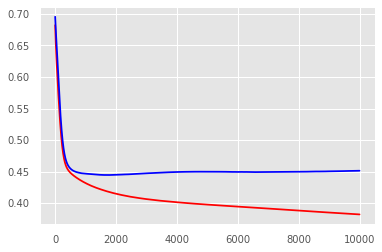

In [95]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(losses, "r-", test_losses, "b-")

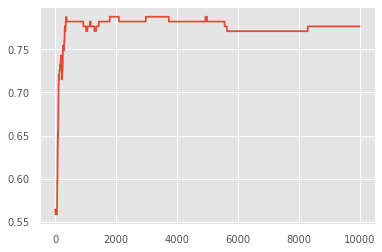

In [96]:
plt.plot(accuracies)

In [97]:
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(X_test[index_from_the_validation_set].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    print(preds_y)

In [98]:
try_a_single_example_with_the_network(60)

tensor([0])
